<a href="https://colab.research.google.com/github/guilhermegranchopro/Prometheus/blob/main/Prometheus/Ronin_SunTzu/Ronin_SunTzu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Escolhendo o Modelo Para Ser Utilizado:**

In [ ]:
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


As primeiras possibilidades de cada variável são aquelas as quais inicialmnete pensas-te que faziam mais sentido:

* symbol = 'AAPL', (retira do ficheito execel, tens o código que extrai)
* max_period = True, (podes ter erros por excesso de pedidos do API)
* start_date = '', '2022-10-31', (1 ano funciona bem para test runs)
* end_date = '', '2023-10-31', (1 ano funciona bem para test runs)
* timeframe = '1Min', '5Min', (mais de 5Min parece perder sentido a teoria)
* fisrt_marker = 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'vwap', 'average_oc', 'average_hl', (a ideia inicial é ver o volume relativo, mas pode ser interessante estudar o trade_count)
* second_marker = 'vwap', 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'average_oc', 'average_hl', (a ideia inicial era ver a média entre o high e o low - 'average_hl', mas fica na duvida ver a média entre o open e o close - 'average_oc', pode também ser muito interessante investigar o vwap)
* third_marker = '', 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'vwap', 'average_oc', 'average_hl', (não pensas te em usar uma terceira coluna para criar as matrizes, mas se os resultados impiricos assim o provarem usa)
* n_rows = 12, 10, 15, 30, 5, (pensa no timeframe quando fazes isso, o 12 pareceu ser o melhor em testes impiricos)
* sort = True, (tens de pensar na sequencia temporal se faz sentido manter ou não)
* relative_first_marker = True, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos, o volume pensas te inicialmnete deixar em impirico para o tensor para normalizares os tensores)
* relative_second_marker = False, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos)
* relative_third_marker = False, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos)
* decimals = '', 3, 4 (tens de ver o que os dados impiricos te dizem se com arrendondamentos facilitas ou n a vida do AI)
* LSTM_boolean = True, (em caso de falso não usas um LSTM e partes do precipio que a relação causal deixa de ser importante para a cosntrução do tensor, quando normalizas os dados a esperança seria de não teres de usar um LSTM)
* epochs = 5, (este numero tende a ser irrelevante porque tens um checkpoint de callback referente ao melhor resultado de validation accuracy)
* early_stopping = True, (podes ligar ou desligar de forma automática o early_stopping, ou seja, o call back aqui)
* call_back = 'val_accuracy', 'val_loss', 'accuracy', 'loss' (escolhes o paramtero que monitora o call back)
* patience = 2, 50, 100, 500, 1000 (escolhes a paciencia do call back)
* batch_size = 64, 16, 32, 128, 256, 512 (varias com o tramanho do dataset, mas pensa que tens conseguido datasets bem grandes portanto usa os maiores valores)

In [ ]:
symbol = 'AAPL'
max_period = True
start_date = '2022-10-31'
end_date = '2023-12-31'
timeframe = '1Min'
fisrt_marker = 'volume'
second_marker = 'vwap'
third_marker = ''
n_rows = 12
sort = True
relative_first_marker = True
relative_second_marker = False
relative_third_marker = False
decimals = ''
LSTM_boolean = True
epochs = 5
early_stopping = True
call_back = 'val_accuracy'
patience = 2
batch_size = 64

In [ ]:
test_loss = 0.0000
test_accuracy = 0.0000

In [ ]:
pip install python-Levenshtein

In [ ]:
pip install fuzzywuzzy

In [ ]:
def create_file_name(symbol, max_period, start_date, end_date,
                     timeframe, fisrt_marker, second_marker, third_marker,
                     n_rows, sort, relative_first_marker, relative_second_marker,
                     relative_third_marker, decimals, LSTM_boolean, epochs,
                     early_stopping, call_back, patience, batch_size,
                     test_loss, test_accuracy):

    # Nome aproximado do arquivo
    nome_aproximado = 's=' + symbol + '+' + 'mp=' + str(max_period) + '+' + 'sd=' + \
    start_date + '+' + 'ed=' + end_date + '+' + 'tf=' + timeframe + '+' + \
    'fm=' + fisrt_marker + '+' + 'sm=' + second_marker + '+' + \
    'tm=' + third_marker + '+' + 'r=' + str(n_rows) + '+' + \
    'sort=' + str(sort) + '+' + 'rfm=' + str(relative_first_marker) + '+' + \
    'rsm=' + str(relative_second_marker) + '+' + \
    'rtm=' + str(relative_third_marker) + '+' + \
    'd=' + decimals + '+' + 'Lb=' + str(LSTM_boolean) + '+' + 'e=' + str(epochs) + '+' + \
    'es=' + str(early_stopping) + '+' + 'cb=' + call_back + '+' + \
    'p=' + str(patience) + '+' + 'bs=' + str(batch_size) + '+' + \
    'tl=' + str(test_loss) + '+' + 'ta=' + str(test_accuracy)

    return nome_aproximado

def get_variables_from_file_name(file_name):

    # Remover a extensão '.keras' se estiver presente
    if file_name.endswith('.keras'):
        file_name = file_name[:-6]  # Remove os últimos 6 caracteres
    elif file_name.endswith('.h5'):
        file_name = file_name[:-3]  # Remove os últimos 3 caracteres

    # Dividir a string pelo caractere '_'
    parts = file_name.split('+')

    # Dicionário para armazenar as variáveis extraídas
    variables = {}

    # Dicionário para mapear os prefixos no nome do arquivo às variáveis da função
    prefix_map = {
        's=': 'symbol',
        'mp=': 'max_period',
        'sd=': 'start_date',
        'ed=': 'end_date',
        'tf=': 'timeframe',
        'fm=': 'first_marker',
        'sm=': 'second_marker',
        'tm=': 'third_marker',
        'r=': 'n_rows',
        'sort=': 'sort',
        'rfm=': 'relative_first_marker',
        'rsm=': 'relative_second_marker',
        'rtm=': 'relative_third_marker',
        'd=': 'decimals',
        'Lb=': 'LSTM_boolean',
        'e=': 'epochs',
        'es=': 'early_stopping',
        'cb=': 'call_back',
        'p=': 'patience',
        'bs=': 'batch_size',
        'tl=': 'test_loss',
        'ta=': 'test_accuracy'
    }

    # Percorrer as partes e extrair o prefixo e o valor correspondente
    for part in parts:
        for prefix, var_name in prefix_map.items():
            if part.startswith(prefix):
                # Extrair o valor removendo o prefixo
                value = part[len(prefix):]

                # Converter os valores para seus tipos originais
                if var_name in ['max_period', 'sort', 'relative_first_marker',
                                'relative_second_marker', 'relative_third_marker',
                                'LSTM_boolean', 'early_stopping']:
                    value = value.lower() == 'true'
                elif var_name in ['n_rows', 'epochs', 'patience', 'batch_size']:
                    value = int(value)
                elif var_name in ['test_loss', 'test_accuracy']:
                    value = float(value)

                # Armazenar o valor no dicionário
                variables[var_name] = value
                break

    return variables

In [ ]:
import os
from fuzzywuzzy import process

# Caminho para o diretório onde os arquivos estão localizados
diretorio = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Neural Network/Models/'

# Nome aproximado do arquivo
nome_aproximado = create_file_name(symbol, max_period, start_date, end_date,
                                   timeframe, fisrt_marker, second_marker, third_marker,
                                   n_rows, sort, relative_first_marker, relative_second_marker,
                                   relative_third_marker, decimals, LSTM_boolean, epochs,
                                   early_stopping, call_back, patience, batch_size,
                                   test_loss, test_accuracy)

# Lista todos os arquivos no diretório
arquivos = os.listdir(diretorio)

# Encontra o arquivo mais próximo
arquivo_mais_proximo, pontuacao = process.extractOne(nome_aproximado, arquivos)

# Encontra o arquivo mais próximo
if process.extractOne(nome_aproximado, arquivos):
    arquivo_mais_proximo, pontuacao = process.extractOne(nome_aproximado, arquivos)
else:
    arquivo_mais_proximo = None
    pontuacao = None

if arquivo_mais_proximo:
    caminho_do_modelo = os.path.join(diretorio, arquivo_mais_proximo)
    print("Nome do arquivo mais próximo:")
    print(arquivo_mais_proximo)
    print()
    print("Caminho completo do modelo:")
    print(caminho_do_modelo)
    print()
    print("Pontuação de similaridade:")
    print(pontuacao)

else:
    print("Nenhum arquivo próximo encontrado.")

Nome do arquivo mais próximo:
s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min+fm=vwap+sm=trade_count+tm=+r=36+sort=False+rfm=True+rsm=False+rtm=False+d=+Lb=True+e=1000+es=True+cb=val_accuracy+p=100+bs=128+tl=0.45428553223609924+ta=0.8215504884719849.keras

Caminho completo do modelo:
/content/drive/MyDrive/AI Financial Analisys/Summer Project/Neural Network/Models/s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min+fm=vwap+sm=trade_count+tm=+r=36+sort=False+rfm=True+rsm=False+rtm=False+d=+Lb=True+e=1000+es=True+cb=val_accuracy+p=100+bs=128+tl=0.45428553223609924+ta=0.8215504884719849.keras

Pontuação de similaridade:
86


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Usando a função get_variables_from_file_name para extrair as variáveis
variables = get_variables_from_file_name(arquivo_mais_proximo)


# Imprimir as variáveis extraídas para depuração
print("Variáveis extraídas:", variables)
print()

# Agora redefinindo todas as variáveis usando o dicionário `variables`
symbol = variables['symbol']
max_period = variables['max_period']
start_date = variables['start_date']
end_date = variables['end_date']
timeframe = variables['timeframe']
fisrt_marker = variables['first_marker']  # Atenção à ortografia: `fisrt_marker` é um erro de digitação. O correto seria `first_marker`.
second_marker = variables['second_marker']
third_marker = variables['third_marker']
n_rows = variables['n_rows']
sort = variables['sort']
relative_first_marker = variables['relative_first_marker']
relative_second_marker = variables['relative_second_marker']
relative_third_marker = variables['relative_third_marker']
decimals = variables['decimals']
LSTM_boolean = variables['LSTM_boolean']
epochs = variables['epochs']
early_stopping = variables['early_stopping']
call_back = variables['call_back']
patience = variables['patience']
batch_size = variables['batch_size']
test_loss = variables['test_loss']
test_accuracy = variables['test_accuracy']

model = load_model(caminho_do_modelo)
print("Modelo e variáveis carregados!")

Variáveis extraídas: {'symbol': 'AAPL', 'max_period': True, 'start_date': '2016-10-31', 'end_date': '2023-12-31', 'timeframe': '5Min', 'first_marker': 'vwap', 'second_marker': 'trade_count', 'third_marker': '', 'n_rows': 36, 'sort': False, 'relative_first_marker': True, 'relative_second_marker': False, 'relative_third_marker': False, 'decimals': '', 'LSTM_boolean': True, 'epochs': 1000, 'early_stopping': True, 'call_back': 'val_accuracy', 'patience': 100, 'batch_size': 128, 'test_loss': 0.45428553223609924, 'test_accuracy': 0.8215504884719849}

Modelo e variáveis carregados!


In [ ]:
# Opcional: visualizar o resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 36, 64)              │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,725 (588.77 KB)

 Trainable params: 50,241 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,484 (392.52 KB)

# **Obtendo os Dados para Modelos LSTM:**

In [ ]:
pip install alpaca-trade-api

In [ ]:
import pandas as pd
from datetime import datetime, timedelta, timezone

# Obter a data e hora atuais
current_date_time = datetime.now()

# Formatar a data como string
current_date = current_date_time.strftime("%Y-%m-%d")
print(f"Hoje é: {current_date}")

def get_end_date(symbol):
    # Obter a data e hora atuais
    current_date_time = datetime.now()
    # Make start timezone aware
    current_date_time = current_date_time.replace(tzinfo=timezone.utc)
    return current_date_time

Hoje é: 2024-09-14


In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import time
from datetime import datetime, timedelta

def alpaca_autentification():
    # Replace with your Alpaca API credentials
    API_KEY = 'AK1RX6F8W6QX207XPLDF'
    SECRET_KEY = 'WaPoTTxkQBGzC51LajCdyw8Pl6svbINa9eDu9TMK'
    BASE_URL = 'https://api.alpaca.markets'  # Use 'https://api.alpaca.markets' for live trading

    # Initialize the Alpaca API
    api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')

    return api

# Function to fetch data in chunks to avoid rate limits
def fetch_data(symbol, start, end, timeframe, api):
    all_data = []
    current_start = start

    while current_start < end:
        current_end = current_start + timedelta(days=7)
        if current_end > end:
            current_end = end

        # Fetch the historical data
        bars = api.get_bars(
            symbol,
            timeframe,
            start=current_start.strftime('%Y-%m-%d'),
            end=current_end.strftime('%Y-%m-%d')
        ).df

        all_data.append(bars)
        current_start = current_end
        time.sleep(1)  # Adjust sleep interval based on rate limits

    return pd.concat(all_data)

In [ ]:
def get_all_data(symbol = 'AAPL', max_period = True, start_date = '', end_date= '', timeframe = '1Min'):
    api = alpaca_autentification()

    if max_period and start_date == '' and end_date == '':
        start_date = get_start_date(symbol)
        end_date = get_end_date(symbol)
    elif start_date != '' and end_date != '':
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
    else:
        start_date = datetime(2022, 12, 31)
        end_date = datetime(2023, 12, 31)

    # Fetch the historical data
    apple_data = fetch_data(symbol, start_date, end_date, timeframe, api)
    return apple_data

In [ ]:
# Function to prepare the data
def prepare_data(data, fisrt_marker, second_marker, third_marker = ''):
    # Selecionar colunas relevantes e fazer uma cópia para evitar advertências
    data_selected = data[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap']].copy()

    # Calcular a média entre 'Open' e 'Close' usando .loc para evitar o SettingWithCopyWarning
    data_selected.loc[:, 'average_oc'] = data_selected[['open', 'close']].mean(axis=1)

    # Calcular a média entre 'High' e 'Low' usando .loc para evitar o SettingWithCopyWarning
    data_selected.loc[:, 'average_hl'] = data_selected[['high', 'low']].mean(axis=1)

    # Selecionar as colunas finais
    if third_marker != '':
        data_final = data_selected[[fisrt_marker, second_marker, third_marker]]
    else:
        data_final = data_selected[[fisrt_marker, second_marker]]

    return data_final

In [ ]:
import numpy as np

# Função para criar as matrizes e os labels
def create_matrices(data_final, n = 12, fisrt_marker = 'volume', second_marker = 'vwap', third_marker = '', relative_fisrt_marker = True, relative_second_marker = False, relative_third_marker = False):
    num_rows = data_final.shape[0]
    num_matrices = num_rows // n  # Número de matrizes completas que podemos formar

    matrices = []
    matrices_y = []

    for i in range(num_matrices):
        start_idx = i * n
        end_idx = start_idx + n
        matrix = data_final.iloc[start_idx:end_idx].copy()

        if relative_fisrt_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[fisrt_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[fisrt_marker] = matrix[fisrt_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        if relative_second_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[second_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[second_marker] = matrix[second_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        if relative_third_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[third_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[third_marker] = matrix[third_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        # Criar labels
        if i > 0:  # Ignorar a primeira matriz para alinhamento correto
            first_value = matrices[i][0, 1]
            last_value = matrices[i][n-1, 1]
            delta = last_value - first_value
            delta_bi = 1 if delta >= 0 else 0
            matrices_y.append(delta_bi)

    return matrices, matrices_y

def sort_matrices(matrices):
    # Ordenar as linhas de cada matriz por ordem decrescente da coluna Average (segunda coluna)
    matrices_x = []
    for matrix in matrices:
        sorted_indices = np.argsort(matrix[:, 1])[::-1]
        sorted_matrix = matrix[sorted_indices]
        matrices_x.append(sorted_matrix)
    return matrices_x

def tensor_creator(matrices_x, matrices_y):
    # Converter listas para arrays numpy
    matrices_x = np.array(matrices_x)
    matrices_y = np.array(matrices_y)
    return matrices_x, matrices_y

In [ ]:
def get_dataset(company_data, n_rows, sort = True, fisrt_marker = 'volume', second_marker = 'vwap' ,
                third_marker = '', relative_fisrt_marker = True, relative_second_marker = False,
                relative_third_marker = False, decimals = ''):
    matrices_x = []
    matrices_y = []

    matrices_x, matrices_y = create_matrices(company_data, n_rows, fisrt_marker, second_marker, third_marker, relative_fisrt_marker, relative_second_marker, relative_third_marker)

    if sort:
        matrices_x = sort_matrices(matrices_x)

    # Remover a última matriz de matrices_x para alinhamento com matrices_y
    if matrices_x:
        matrices_x.pop()

    matrices_x, matrices_y = tensor_creator(matrices_x, matrices_y)

    if decimals != '':
        matrices_x = np.round(matrices_x, decimals = decimals)
    return matrices_x, matrices_y

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(matrices_x, matrices_y, LSTM = True):

    if LSTM:
        # Total de amostras
        n_samples = matrices_x.shape[0]

        # Índices para divisão
        train_size = int(0.6 * n_samples)  # 60% para treino
        val_size = int(0.2 * n_samples)    # 20% para validação
        test_size = n_samples - train_size - val_size  # 20% para teste

        # Dividir os dados sequencialmente
        X_train = matrices_x[:train_size]
        y_train = matrices_y[:train_size]

        X_val = matrices_x[train_size:train_size + val_size]
        y_val = matrices_y[train_size:train_size + val_size]

        X_test = matrices_x[train_size + val_size:]
        y_test = matrices_y[train_size + val_size:]
    else:
        # Dividir os dados em conjuntos de treinamento + validação e teste
        X_train_val, X_test, y_train_val, y_test = train_test_split(matrices_x, matrices_y, test_size=0.2, random_state=42)

        # Dividir o conjunto de treinamento + validação em treinamento e validação
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
import os
from fuzzywuzzy import process

def old_dataset_function(symbol, max_period, start_date, end_date, timeframe):

    # Defina o caminho do diretório no Google Drive
    diretorio = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data'

    # Nome aproximado do arquivo
    nome_aproximado = 's=' + symbol + '+' + 'mp=' + str(max_period) + '+' + 'sd=' + \
        start_date + '+' + 'ed=' + end_date + '+' + 'tf=' + timeframe + '.csv'

    # Lista todos os arquivos no diretório
    arquivos = os.listdir(diretorio)

    # Encontra o arquivo mais próximo
    if process.extractOne(nome_aproximado, arquivos):
        arquivo_mais_proximo, pontuacao = process.extractOne(nome_aproximado, arquivos)
    else:
        arquivo_mais_proximo = None
        pontuacao = None

    if arquivo_mais_proximo and pontuacao==100:
        caminho_do_modelo = os.path.join(diretorio, arquivo_mais_proximo)
        print("Nome do arquivo mais próximo:")
        print(arquivo_mais_proximo)
        print()
        print("Caminho completo do modelo:")
        print(caminho_do_modelo)
        print()
        print("Pontuação de similaridade:")
        print(pontuacao)
        old_dataset = True
    else:
        print("Nenhum arquivo próximo encontrado.")
        caminho_do_modelo = ''
        old_dataset = False

    return old_dataset, caminho_do_modelo

In [ ]:
import os

def save_dataset(company_data, symbol, max_period, start_date, end_date, timeframe):
    # Defina o caminho do diretório no Google Drive
    caminho_para_salvar_dados = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data'

    # Verifique se o diretório existe, caso contrário, crie-o
    if not os.path.exists(caminho_para_salvar_dados):
        os.makedirs(caminho_para_salvar_dados)
        print(f"Diretório {caminho_para_salvar_dados} criado com sucesso.")
    else:
        print(f"O diretório {caminho_para_salvar_dados} já existe.")

    print()

    file_name = 's=' + symbol + '+' + 'mp=' + str(max_period) + '+' + 'sd=' + \
            start_date + '+' + 'ed=' + end_date + '+' + 'tf=' + timeframe + '.csv'

    # Defina o caminho completo para salvar o arquivo
    caminho_completo_dados = os.path.join(caminho_para_salvar_dados, file_name)

    # Salve o dataframe no caminho especificado
    company_data.to_csv(caminho_completo_dados)

    print("Ficheiro dos Dados:")
    print(file_name)
    print()
    print("Dados salvos em:")
    print(caminho_para_salvar_dados)

In [ ]:
import pandas as pd

old_dataset, caminho_do_modelo = old_dataset_function(symbol, max_period, start_date, end_date, timeframe)

if old_dataset:
    all_company_data = pd.read_csv(caminho_do_modelo, index_col=0)
else:
    all_company_data = get_all_data(symbol, max_period, start_date, end_date, timeframe)
    save_dataset(all_company_data, symbol, max_period, start_date, end_date, timeframe)

print(all_company_data)
print(all_company_data.shape)
print()

Nome do arquivo mais próximo:
s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min.csv

Caminho completo do modelo:
/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data/s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min.csv

Pontuação de similaridade:
100
                              close    high       low  trade_count      open  \
timestamp                                                                      
2016-10-31 08:00:00+00:00  113.9000  113.90  113.7500            6  113.8900   
2016-10-31 08:05:00+00:00  113.4000  113.76  113.4000            3  113.7600   
2016-10-31 09:00:00+00:00  113.7600  113.76  113.7600            2  113.7600   
2016-10-31 09:20:00+00:00  113.9500  113.95  113.8800            2  113.8800   
2016-10-31 10:05:00+00:00  113.7500  113.75  113.7500            1  113.7500   
...                             ...     ...       ...          ...       ...   
2023-12-30 00:35:00+00:00  192.1200  192.14  192.1100           44  192.1400   
20

In [ ]:
needed_company_data = prepare_data(all_company_data, fisrt_marker, second_marker, third_marker)

print(needed_company_data)
print(needed_company_data.shape)
print()

                                 vwap  trade_count
timestamp                                         
2016-10-31 08:00:00+00:00  113.845860            6
2016-10-31 08:05:00+00:00  113.650304            3
2016-10-31 09:00:00+00:00  113.780833            2
2016-10-31 09:20:00+00:00  113.905455            2
2016-10-31 10:05:00+00:00  113.750000            1
...                               ...          ...
2023-12-30 00:35:00+00:00  192.130354           44
2023-12-30 00:40:00+00:00  192.135717           41
2023-12-30 00:45:00+00:00  192.204240           37
2023-12-30 00:50:00+00:00  192.221821           54
2023-12-30 00:55:00+00:00  192.183319           89

[369080 rows x 2 columns]
(369080, 2)



In [ ]:
matrices_x, matrices_y = get_dataset(needed_company_data, n_rows, sort, fisrt_marker, second_marker , third_marker, relative_first_marker, relative_second_marker, relative_third_marker, decimals)

print(matrices_x)
print(matrices_x.shape)
print(matrices_y)
print(matrices_y.shape)
print()

[[[2.78105903e-02 6.00000000e+00]
  [2.77628193e-02 3.00000000e+00]
  [2.77947053e-02 2.00000000e+00]
  ...
  [2.77705655e-02 3.84200000e+03]
  [2.77550589e-02 4.29400000e+03]
  [2.76940036e-02 3.62400000e+03]]

 [[2.77261290e-02 3.14300000e+03]
  [2.77187154e-02 3.16100000e+03]
  [2.77051727e-02 3.18100000e+03]
  ...
  [2.78044720e-02 1.08000000e+03]
  [2.78147684e-02 1.17100000e+03]
  [2.78350389e-02 1.08000000e+03]]

 [[2.77650674e-02 1.26500000e+03]
  [2.77669629e-02 9.07000000e+02]
  [2.77890572e-02 1.27100000e+03]
  ...
  [2.77430045e-02 2.43700000e+03]
  [2.77361180e-02 1.87500000e+03]
  [2.77251092e-02 2.20300000e+03]]

 ...

 [[2.77879953e-02 1.90000000e+01]
  [2.77799317e-02 2.50000000e+01]
  [2.77937222e-02 4.60000000e+01]
  ...
  [2.77534759e-02 3.78000000e+03]
  [2.77305929e-02 5.72700000e+03]
  [2.77247590e-02 1.51820000e+04]]

 [[2.79104742e-02 2.08220000e+04]
  [2.79140008e-02 1.95340000e+04]
  [2.79043118e-02 1.77060000e+04]
  ...
  [2.77147458e-02 3.71100000e+03]
  [2

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(matrices_x, matrices_y, LSTM_boolean)

# Exibir as formas dos arrays resultantes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print()

Shape of X_train: (6150, 36, 2)
Shape of y_train: (6150,)
Shape of X_val: (2050, 36, 2)
Shape of y_val: (2050,)
Shape of X_test: (2051, 36, 2)
Shape of y_test: (2051,)



# **Prevendo o Test Dataset no Mercado Financeiro:**

In [ ]:
import pandas as pd
from scipy.stats import norm

# Dividir o DataFrame em subconjuntos de `n_rows` linhas
def split_dataframe(df, n_rows):
    # Número total de linhas no DataFrame
    num_rows = len(df)
    # Dividir o DataFrame em partes
    return np.array_split(df, np.arange(n_rows, num_rows, n_rows))

# Função para processar os subconjuntos
def process_subsets(subsets, n_rows):
    processed_subsets = []
    for subset in subsets:
        if len(subset) >= n_rows:
            # Manter apenas a primeira linha (primeiro 'open')
            first_open = subset.iloc[[0]].copy()
            # Manter apenas a última linha (último 'close')
            last_close = subset.iloc[[-1]].copy()
            # Concatenar os resultados
            subset_processed = pd.concat([first_open, last_close])
            processed_subsets.append(subset_processed)

    return processed_subsets

def select_open_close(processed_subsets):
    selected_data = []

    # Selecionar o primeiro 'open' de todos os subconjuntos (exceto o último)
    for i, subset in enumerate(processed_subsets[:-1]):  # Ignorar o último subconjunto
        first_open = subset.iloc[0]['open']  # Seleciona o primeiro 'open'
        selected_data.append(first_open)

    # Para o último subconjunto, selecionar apenas o último 'close'
    last_subset = processed_subsets[-1]
    last_close = last_subset.iloc[-1]['close']  # Seleciona o último 'close'
    selected_data.append(last_close)

    return selected_data

In [ ]:
needed_company_data = prepare_data(all_company_data, 'open', 'close')

print(needed_company_data)
print(needed_company_data.shape)
print()

NameError: name 'prepare_data' is not defined

In [ ]:
# Usar a função para dividir `needed_company_data`
subsets = split_dataframe(needed_company_data, n_rows)

# Exibir informações sobre os subconjuntos
for i, subset in enumerate(subsets):
    print(f"Subset {i+1}:")
    print(subset)
    print(f"Shape: {subset.shape}")
    print()

In [ ]:
# Processar cada subconjunto para manter apenas o primeiro 'open' e o último 'close'
processed_subsets = process_subsets(subsets, n_rows)

# Exibir informações sobre os subconjuntos processados
for i, subset in enumerate(processed_subsets):
    print(f"Processed Subset {i+1}:")
    print(subset)
    print(f"Shape: {subset.shape}")
    print()

In [ ]:
dates_list = []  # Lista para armazenar as datas

# Número total de subconjuntos
num_subsets = len(processed_subsets)

# Iterar sobre todos os subconjuntos, exceto o último
for i in range(num_subsets - 1):
    subset = processed_subsets[i]
    # Garantir que o índice é do tipo datetime
    subset.index = pd.to_datetime(subset.index)
    # Extrair a data do primeiro 'open' e remover o horário
    first_date = subset.index[0].date()  # Apenas a data
    dates_list.append(first_date)

# Para o último subconjunto, garantir que o índice é datetime e extrair a data
last_subset = processed_subsets[-1]
last_subset.index = pd.to_datetime(last_subset.index)
last_date = last_subset.index[-1].date()  # Apenas a data
dates_list.append(last_date)

# Exibir as datas extraídas
print("Datas extraídas:")
for i, date in enumerate(dates_list):
    print(f"Subset {i+1}: {date}")

In [ ]:
# Extrair os últimos "X_test + 1" subconjuntos da lista dates_list
last_subsets_dates = dates_list[-(X_test.shape[0] + 1):]

# Exibir os subconjuntos extraídos
print("Últimos subconjuntos extraídos:")
for i, date in enumerate(last_subsets_dates):
    print(f"Subset {i+1}: {date}")

In [ ]:
# Selecionar os primeiros "open" e o último "close"
final_selection = select_open_close(processed_subsets)

# Exibir o resultado
print("Primeiro 'open' de cada subconjunto (exceto o último) e último 'close' do último subconjunto:")
for i, value in enumerate(final_selection):
    print(f"Subset {i+1}: {value}")

final_selection = np.array(final_selection)
print(final_selection.shape)

In [ ]:
# Selecionar os últimos `X_test.shape[0] + 1` subconjuntos de final_selection
num_to_select = X_test.shape[0] + 1  # Quantidade de subconjuntos a selecionar
selected_subsets = final_selection[-num_to_select:]  # Selecionar os últimos 'num_to_select' subconjuntos

# Exibir o resultado
print(f"Últimos {num_to_select} subconjuntos de final_selection:")
for i, value in enumerate(selected_subsets, 1):
    print(f"Subset {i}: {value}")

# Converter para um array NumPy
selected_subsets = np.array(selected_subsets)
print(selected_subsets.shape)

In [ ]:
# Fazer previsões com o modelo
previsoes = model.predict(X_test)

# Exibir as previsões e as classes binárias
print()
print("Previsões como probabilidades:", previsoes)
print()
print(previsoes.shape)

In [ ]:
import matplotlib.pyplot as plt

# Criar histograma das probabilidades
plt.hist(previsoes, bins=500, color='blue', edgecolor='black')

# Configurações do gráfico
plt.xlabel('Probabilidade')
plt.ylabel('Número de Amostras')
plt.title('Distribuição das Probabilidades das Previsões')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [ ]:
# Converter probabilidades em classes binárias (0 ou 1)
classes_preditas = (previsoes > 0.5).astype(int)

# Exibir as classes binárias
print("Classes previstas (binárias):", classes_preditas)
print()
print(classes_preditas.shape)

In [ ]:
# Contar o número de 0s e 1s
num_zeros = np.sum(classes_preditas == 0)
num_uns = np.sum(classes_preditas == 1)

# Calcular as percentagens
percent_zero = (num_zeros / len(classes_preditas)) * 100
percent_one = (num_uns / len(classes_preditas)) * 100

# Criar histograma com cores específicas para cada classe
plt.bar([0], [num_zeros], color='red', edgecolor='black', width=0.6, label='Classe 0')
plt.bar([1], [num_uns], color='green', edgecolor='black', width=0.6, label='Classe 1')

# Adicionar contagem específica e percentagem a cada barra com uma margem acima para evitar sobreposição
plt.text(0, num_zeros + 0.1, f'{num_zeros}\n({percent_zero:.2f}%)', ha='center', va='bottom', fontsize=12)
plt.text(1, num_uns + 0.1, f'{num_uns}\n({percent_one:.2f}%)', ha='center', va='bottom', fontsize=12)

# Configurações do gráfico
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Classe Predita')
plt.ylabel('Número de Previsões')
plt.title('Histograma das Previsões Binárias')
plt.ylim(0, max(num_zeros, num_uns) * 1.2)  # Ajusta o limite superior do eixo Y para dar espaço para o texto
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# Inicializar uma lista para armazenar o tensor
tensor = []

# Criar o tensor para os primeiros 2051 elementos
for i in range(2051):
    tensor.append([selected_subsets[i], previsoes[i, 0]])

# Adicionar o último elemento de selected_subsets com 'none' para previsoes
tensor.append([selected_subsets[2051], 'none'])

# Converter a lista para um array NumPy (dtype=object para lidar com tipos mistos)
tensor_np = np.array(tensor, dtype=object)

# Exibir o tensor final
print("Tensor final:")
print(tensor_np)
print(f"Shape do tensor: {tensor_np.shape}")

# **Estratégias de Gestão do Portefólio de Investimentos**

### **Buy and Hold Classic**

Evolução natural de uma carteira sem estratégia (evolução do mercado).

In [ ]:
# Inicializar variáveis para a evolução natural do mercado
initial_fund_natural = 100000  # Fundo inicial de $100,000
natural_fund = initial_fund_natural

# Comprar ações no segundo índice do tensor (primeira operação de compra)
initial_price_natural = float(tensor_np[1][0])  # Preço da ação no segundo índice
num_shares_natural = natural_fund / initial_price_natural  # Quantidade de ações compradas (fracionárias)
natural_fund -= num_shares_natural * initial_price_natural  # Atualiza o fundo após compra

print(f"Comprado {num_shares_natural:.6f} ações a {initial_price_natural} cada, fundo restante: ${natural_fund:.2f}")

# No final do tensor, vender todas as ações restantes
final_price_natural = float(tensor_np[-1][0])  # Preço final para venda
natural_fund += num_shares_natural * final_price_natural  # Vende todas as ações restantes

print(f"Vendido {num_shares_natural:.6f} ações a {final_price_natural} cada no final, fundo total: ${natural_fund:.2f}")

# Calcular o percentual de crescimento
initial_investment = initial_fund_natural
final_value = natural_fund
percentage_increase = ((final_value - initial_investment) / initial_investment) * 100

print(f"\nPercentual de crescimento do fundo com a estratégia natural: {percentage_increase:.3f}%")

Comprado 591.575958 ações a 169.04 cada, fundo restante: $0.00
Vendido 591.575958 ações a 192.15 cada no final, fundo total: $113671.32

Percentual de crescimento do fundo com a estratégia natural: 13.671%


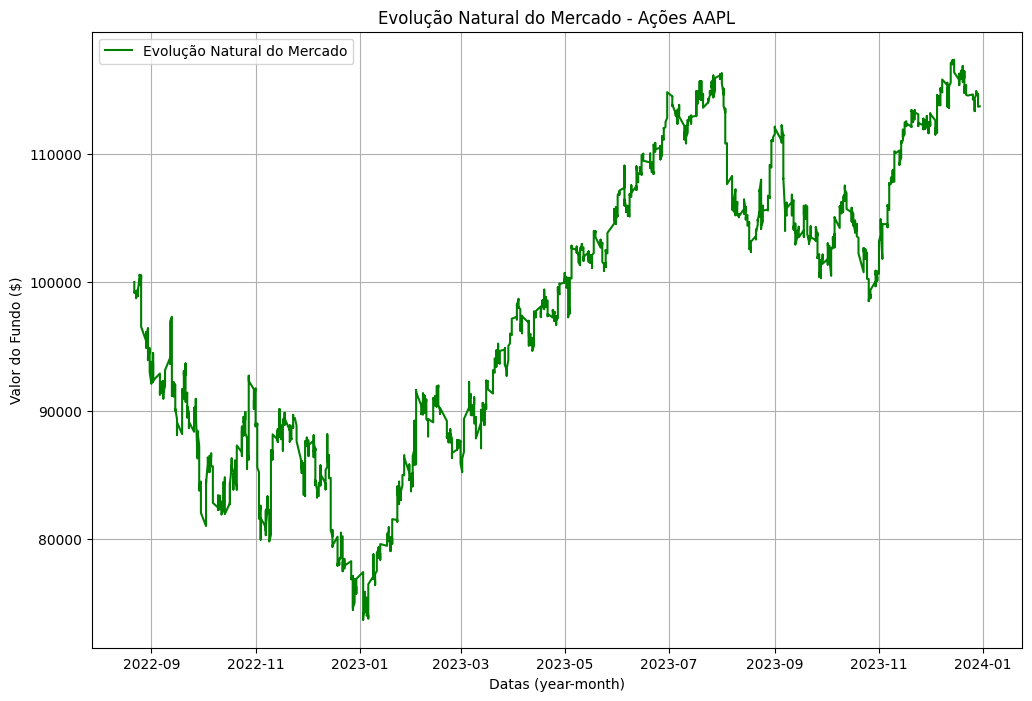

In [ ]:
# Criar uma lista para armazenar a evolução do valor do fundo para a evolução natural do mercado
natural_fund_values = []

# Inicializar variáveis para a evolução natural do mercado
initial_fund = 100000  # Fundo inicial de $100,000
initial_price_natural = float(tensor_np[1][0])  # Preço da ação no segundo índice do tensor
num_shares_natural = initial_fund / initial_price_natural  # Ações fracionárias compradas
current_fund_natural = initial_fund - num_shares_natural * initial_price_natural

# A primeira posição do fundo natural é logo após a compra inicial
natural_fund_values.append(current_fund_natural + num_shares_natural * initial_price_natural)

# Simular a evolução natural do mercado
for i in range(1, len(tensor_np)):
    price = float(tensor_np[i][0])

    if i < len(tensor_np) - 1:
        # Atualizar a evolução natural do mercado ao longo do tempo
        natural_fund_values.append(current_fund_natural + num_shares_natural * price)

# Registrar o valor final para a evolução natural
final_price_natural = float(tensor_np[-1][0])
natural_fund_values.append(current_fund_natural + num_shares_natural * final_price_natural)

# Gerar o gráfico da evolução do fundo
plt.figure(figsize=(12, 8))
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução Natural do Mercado - Ações ' + symbol)
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

### **Absolute Buy and Sell**

Comprar em absoluto, ou seja, gastar todo o dinheiro da carteira ao primeiro sinal positivo "1". Buy and Hold, ou seja, manter todo o dinheiro nas ações uma vez executada a compra. Vender em absoluto, ou seja, vender todo o dinheiro das ações ao primeiro sinal negativo "0". Repetir infinitamente o processo.

In [ ]:
sensibilidade_decisiva = 0.76

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas (agora pode ser fracionário)

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = tensor_np[i + 1][0]  # Preço da ação para compra/venda
    prediction = tensor_np[i][1]  # Previsão atual

    if prediction != 'none':  # Ignorar a última entrada sem previsão
        if prediction > sensibilidade_decisiva and fund > 0:
            # Comprar ações fracionárias
            num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações
            print(f"Comprado {num_shares_to_buy:.6f} ações a {current_price} cada, fundo restante: ${fund:.2f}")

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            # Vender ações fracionárias
            fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
            print(f"Vendido {num_shares:.6f} ações a {current_price} cada, fundo total: ${fund:.2f}")
            num_shares = 0.0  # Zerar o número de ações

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = tensor_np[-1][0]  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    print(f"Vendido {num_shares:.6f} ações a {final_price} cada no final, fundo total: ${fund:.2f}")
    num_shares = 0.0  # Zerar o número de ações

# Exibir o balanço final do fundo
print(f"\nBalanço final do fundo de investimento: ${fund:.2f}")

# Calcular o percentual de crescimento
percentage_increase_strategy = ((fund - initial_fund) / initial_fund ) * 100

print(f"\nPercentual de crescimento do fundo com a estratégia: {percentage_increase_strategy:.3f}%")

Comprado 595.699053 ações a 167.87 cada, fundo restante: $0.00
Vendido 595.699053 ações a 167.365 cada, fundo total: $99699.17
Comprado 595.716850 ações a 167.36 cada, fundo restante: $0.00
Vendido 595.716850 ações a 167.21 cada, fundo total: $99609.81
Comprado 588.015434 ações a 169.4 cada, fundo restante: $0.00
Vendido 588.015434 ações a 169.265 cada, fundo total: $99530.43
Comprado 587.234836 ações a 169.49 cada, fundo restante: $0.00
Vendido 587.234836 ações a 167.82 cada, fundo total: $98549.75
Comprado 609.951174 ações a 161.5699 cada, fundo restante: $0.00
Vendido 609.951174 ações a 160.3899 cada, fundo total: $97830.01
Comprado 606.434464 ações a 161.32 cada, fundo restante: $0.00
Vendido 606.434464 ações a 161.17 cada, fundo total: $97739.04
Comprado 604.858238 ações a 161.59 cada, fundo restante: $0.00
Vendido 604.858238 ações a 161.25 cada, fundo total: $97533.39
Comprado 610.308434 ações a 159.81 cada, fundo restante: $0.00
Vendido 610.308434 ações a 159.29 cada, fundo tota

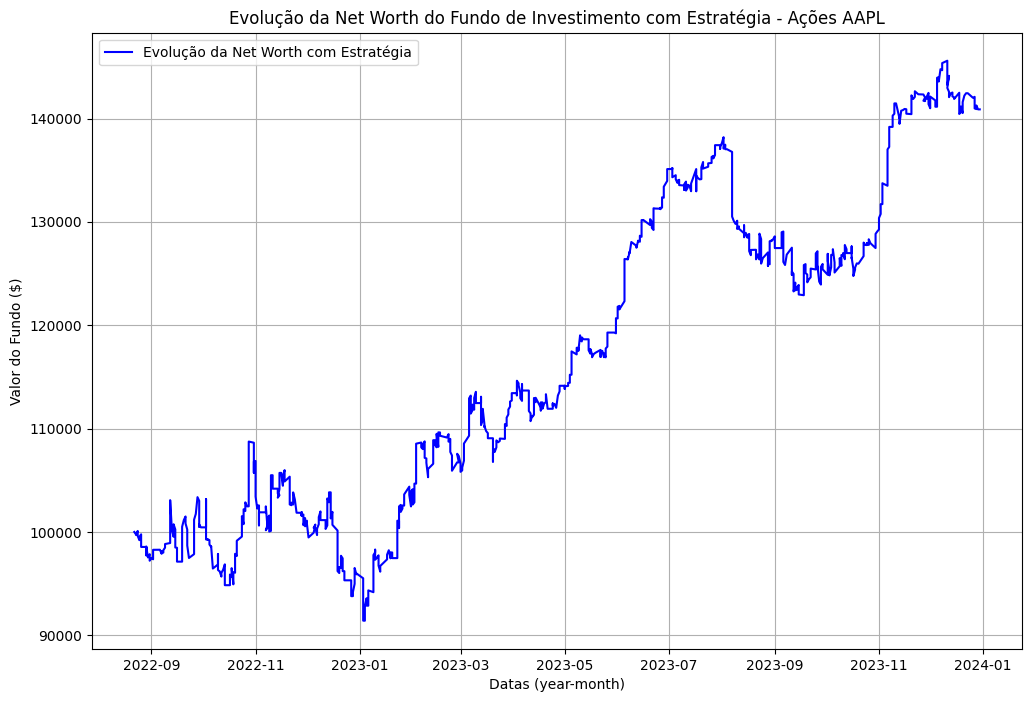

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas (permitindo frações)

# Listas para armazenar a evolução do fundo ao longo do tempo
networth_strategy = []

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        # Comprar ações fracionárias
        num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        # Vender ações fracionárias
        fund += num_shares * current_price  # Vende todas as ações fracionárias e atualiza o fundo
        num_shares = 0.0  # Zerar o número de ações

    # Registrar o valor do fundo ao longo do tempo
    networth_strategy.append(fund + num_shares * current_price)

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações fracionárias restantes
    num_shares = 0.0  # Zerar o número de ações

# Registrar o valor final do fundo
networth_strategy.append(fund)

# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(last_subsets_dates, networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações ' + symbol)
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

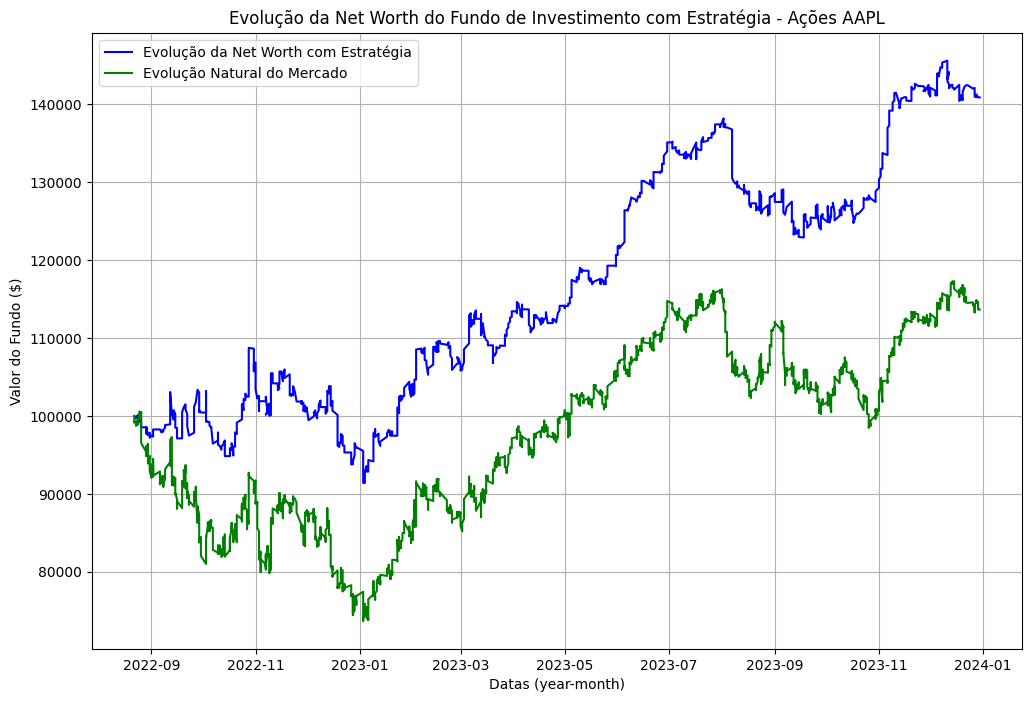

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(last_subsets_dates, networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações ' + symbol)
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Dinheiro extra ganho ao se ter usado AI: {fund-percentage_increase-final_value:.3f}$")

print(f"\nMelhoria percentual ao se ter usado AI: {percentage_increase_strategy-percentage_increase:.3f}%")

Dinheiro extra ganho ao se ter usado AI: 27200.913$

Melhoria percentual ao se ter usado AI: 27.215%




**Estudo da Melhor Sensibilidade Decisiva:**

Coordenadas do ponto mais elevado: Sensibilidade Decisiva = 0.76, Melhoria Percentual = 27.21%


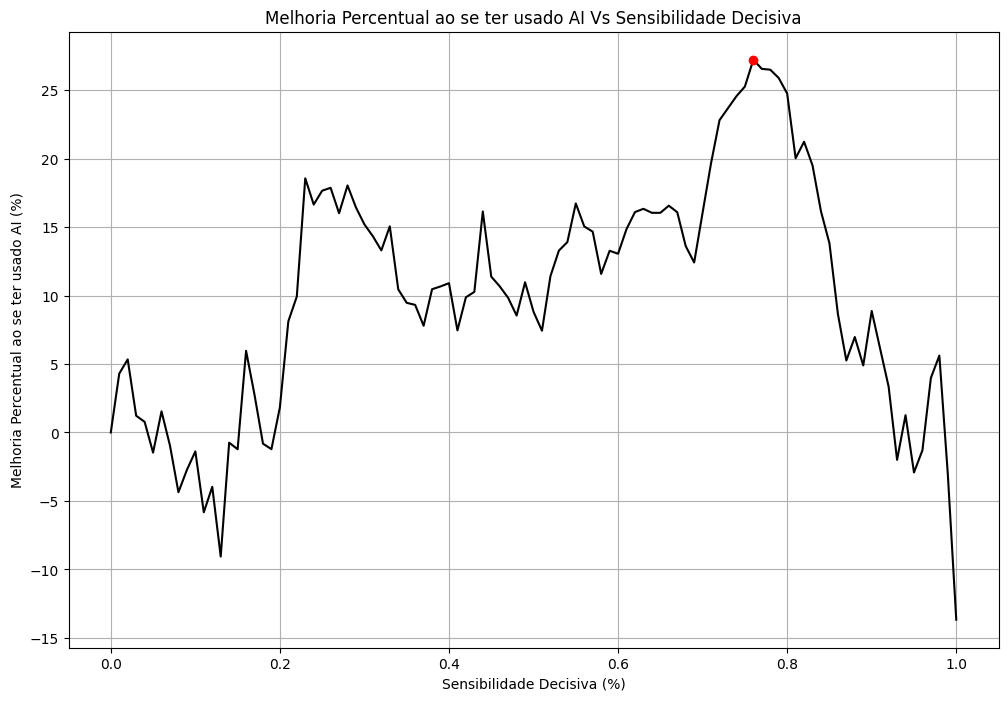

In [ ]:
sensibilidade_decisiva_array = np.arange(0, 1.01, 0.01)
percentages_diference_array = []

for a in range(len(sensibilidade_decisiva_array)):
    # Inicializar variáveis
    initial_fund = 100000  # Fundo inicial de $100,000
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas (permitindo frações)

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual

        if prediction_str != 'none':  # Ignorar a última entrada sem previsão
            prediction = float(prediction_str)

            if prediction > sensibilidade_decisiva_array[a] and fund > 0:
                # Comprar ações fracionárias
                num_shares_to_buy = fund / current_price  # Quantidade de ações fracionárias que podemos comprar
                fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
                num_shares += num_shares_to_buy  # Atualiza o número de ações

            elif prediction <= sensibilidade_decisiva_array[a] and num_shares > 0:
                # Vender ações fracionárias
                fund += num_shares * current_price  # Vende todas as ações fracionárias e atualiza o fundo
                num_shares = 0.0  # Zerar o número de ações

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações fracionárias restantes
        num_shares = 0.0  # Zerar o número de ações

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((fund - initial_fund) / initial_fund) * 100

    # Armazenar a diferença percentual em relação à estratégia natural
    percentages_diference_array.append(percentage_increase_strategy - percentage_increase)

# Encontrar o índice do maior valor em percentages_diference_array
max_index = np.argmax(percentages_diference_array)
max_sensibilidade = sensibilidade_decisiva_array[max_index]
max_percentage_difference = percentages_diference_array[max_index]

print(f"Coordenadas do ponto mais elevado: Sensibilidade Decisiva = {max_sensibilidade:.2f}, Melhoria Percentual = {max_percentage_difference:.2f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(sensibilidade_decisiva_array, percentages_diference_array, color='black')
plt.scatter(max_sensibilidade, max_percentage_difference, color='red', zorder=5)  # Destacar o ponto mais elevado
plt.title('Melhoria Percentual ao se ter usado AI Vs Sensibilidade Decisiva')
plt.xlabel('Sensibilidade Decisiva (%)')
plt.ylabel('Melhoria Percentual ao se ter usado AI (%)')
plt.grid(True)
plt.show()

**Estudo do Retorno em Função do Valor Inicial do Fundo:**

In [ ]:
sensibilidade_decisiva = 0.76

Coordenadas do ponto máximo absoluto: Dinheiro Inicial = $9697116.67, Percentual de Crescimento = 40.886%


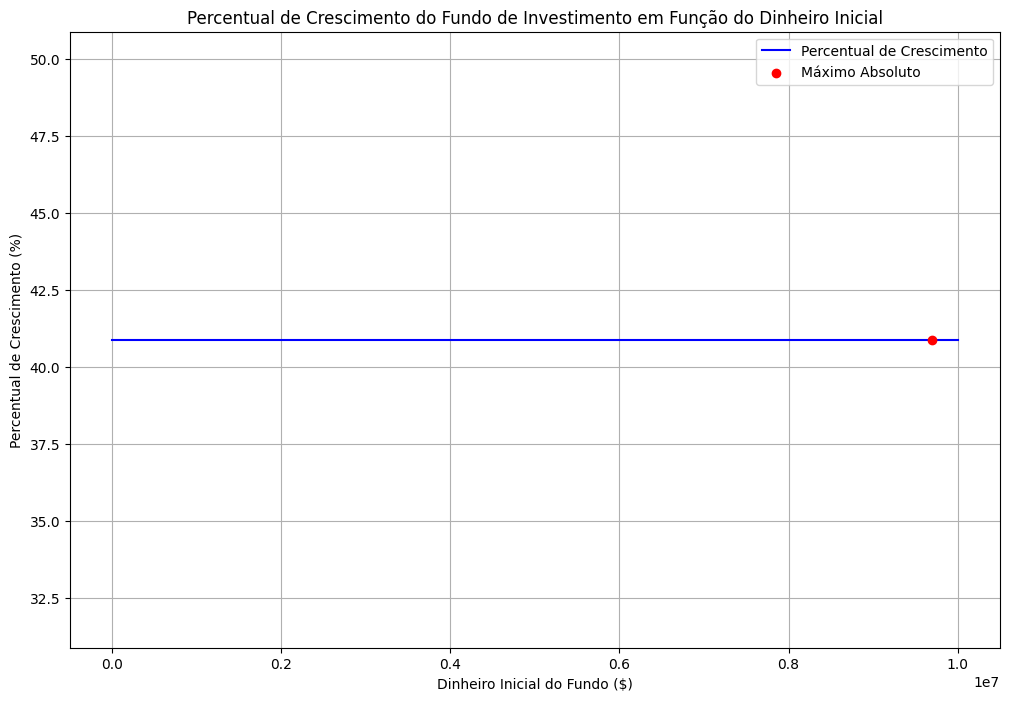

In [ ]:
import matplotlib.pyplot as plt

# Definir a faixa de valores para o fundo inicial
initial_fund_values = np.linspace(50, 10000150, 100)  # Valores de $50 a $10,000,000

# Listas para armazenar os resultados
percentual_ganhos = []

# Loop sobre todos os valores de fundo inicial
for initial_fund in initial_fund_values:
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas (agora pode ser fracionário)

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

        # Verificar se prediction_str pode ser convertido para float
        if prediction_str != 'none':
            prediction = float(prediction_str)
        else:
            prediction = 0  # Definir a previsão como 0 se for 'none'

        if prediction > sensibilidade_decisiva and fund > 0:
            # Comprar ações fracionárias
            num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            # Vender ações fracionárias
            fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
            num_shares = 0.0  # Zerar o número de ações

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações restantes

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((fund - initial_fund) / initial_fund) * 100
    percentual_ganhos.append(percentage_increase_strategy)

# Verificar os valores de percentual_ganhos
#print(f"Percentuais de Ganho: {percentual_ganhos}")

# Encontrar o índice do valor máximo de percentual_ganhos
max_index = np.argmax(percentual_ganhos)
max_initial_fund = initial_fund_values[max_index]
max_percentage_increase = percentual_ganhos[max_index]

print(f"Coordenadas do ponto máximo absoluto: Dinheiro Inicial = ${max_initial_fund:.2f}, Percentual de Crescimento = {max_percentage_increase:.3f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(initial_fund_values, percentual_ganhos, label='Percentual de Crescimento', color='blue')
plt.scatter(max_initial_fund, max_percentage_increase, color='red', zorder=5, label="Máximo Absoluto")  # Destacar o ponto máximo

# Ajustar limites do eixo Y com base nos dados
plt.ylim(min(percentual_ganhos) - 10, max(percentual_ganhos) + 10)

plt.title('Percentual de Crescimento do Fundo de Investimento em Função do Dinheiro Inicial')
plt.xlabel('Dinheiro Inicial do Fundo ($)')
plt.ylabel('Percentual de Crescimento (%)')
plt.grid(True)
plt.legend()
plt.show()

### **Parcial Buy and Sell in Function of Predictions Probabilaty**

Agora eu quero testar uma nova estratégia. As compras e as vendas vão ser de forma percentual. Ou seja, sempre que existe um sinal positivo para compra - "1", deve ser gasto "coeficiente * grau_certeza"% (o grau_certeza é dado por "predictions", relembrando que sempre que "predictions" é superior a "sensibilidade_decisiva" é um "1" e sempre que "predictions" é inferior a "sensibilidade_decisiva" é um "0", o grau_certeza é pela certeza que o modelo tem se se trata de um "0" ou de um "1", isto pode ser inferido através de "predictions") do dinheiro do fundo de investimento na compra de ações, se existir algum dinheiro ainda no fundo para o fazer de acordo com o percentual calculado. Sempre que existe um sinal positivo de venda - "0", devem ser vendidas "coeficiente * grau_certeza"% das ações do fundo de investimento, se o fundo tiver ainda ações suficientes para o fazer de acordo com a percentagem calculada. Escreve o código para esta nova estratégia.

In [ ]:
sensibilidade_decisiva = 0.5
coeficiente = 0.1

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente * grau_certeza * num_shares  # Quantidade de ações a vender
        fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
        print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    print(f"Vendido {num_shares:.4f} ações a {final_price:.2f} cada no final, fundo total: ${fund:.2f}")
    num_shares = 0  # Zerar o número de ações

# Exibir o balanço final do fundo
print(f"\nBalanço final do fundo de investimento: ${fund:.2f}")

# Calcular o percentual de crescimento
percentage_increase_strategy = ((fund - initial_fund) / initial_fund ) * 100
print(f"\nPercentual de crescimento do fundo com a nova estratégia: {percentage_increase_strategy:.3f}%")

Comprado 59.4476 ações a 167.87 cada, fundo restante: $90020.53
Comprado 53.4419 ações a 167.47 cada, fundo restante: $81070.61
Vendido 6.8815 ações a 167.37 cada, fundo total: $82222.34
Vendido 9.0960 ações a 167.87 cada, fundo total: $83749.29
Vendido 7.8048 ações a 166.90 cada, fundo total: $85051.92
Comprado 50.7292 ações a 167.36 cada, fundo restante: $76561.88
Comprado 43.8286 ações a 168.03 cada, fundo restante: $69197.35
Vendido 12.6087 ações a 167.21 cada, fundo total: $71305.65
Vendido 14.4983 ações a 167.46 cada, fundo total: $73733.53
Vendido 11.1101 ações a 167.80 cada, fundo total: $75597.81
Comprado 44.5124 ações a 169.40 cada, fundo restante: $68057.40
Comprado 33.4365 ações a 168.71 cada, fundo restante: $62416.33
Vendido 19.5100 ações a 169.26 cada, fundo total: $65718.68
Vendido 17.4735 ações a 169.21 cada, fundo total: $68675.37
Vendido 16.0032 ações a 170.01 cada, fundo total: $71396.09
Comprado 38.1016 ações a 169.49 cada, fundo restante: $64938.24
Comprado 38.102

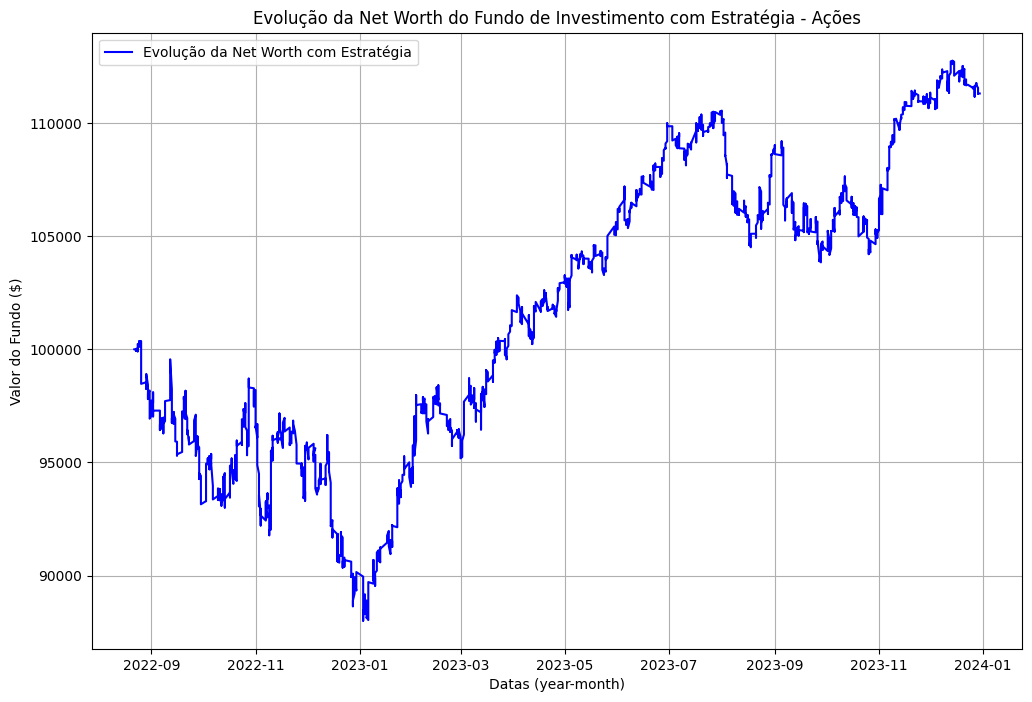

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
networth_strategy = []  # Armazenar a net worth ao longo do tempo

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        #print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente * grau_certeza * num_shares  # Quantidade de ações a vender
        num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
        fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda
        #print(f"Vendido {num_shares_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

    # Calcular net worth após cada iteração
    networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
    networth_strategy.append(networth)  # Armazenar a net worth

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    num_shares = 0  # Zerar o número de ações

# Adicionar a net worth final após vender as ações no último período
networth_strategy.append(fund)

# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-len(networth_strategy):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

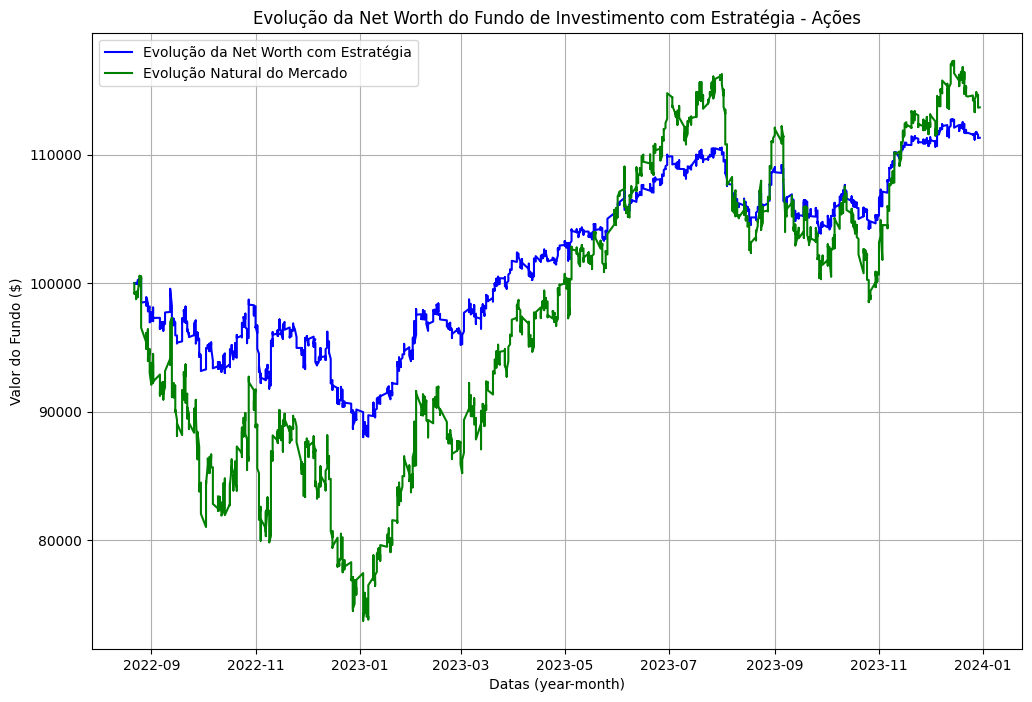

In [ ]:
# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-(len(networth_strategy)):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Dinheiro extra ganho ao se ter usado AI: {fund-percentage_increase-final_value:.3f}$")

print(f"\nMelhoria percentual ao se ter usado AI: {percentage_increase_strategy-percentage_increase:.3f}%")

Dinheiro extra ganho ao se ter usado AI: -2384.518$

Melhoria percentual ao se ter usado AI: -2.371%


**Estudo do Melhor Coeficiente e Melhor Sensibilidade DEcisiva para Formatar o Percentual Investido:**

Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva=0.76, Coeficiente=1.00, Ganho Percentual (%)=39.5859



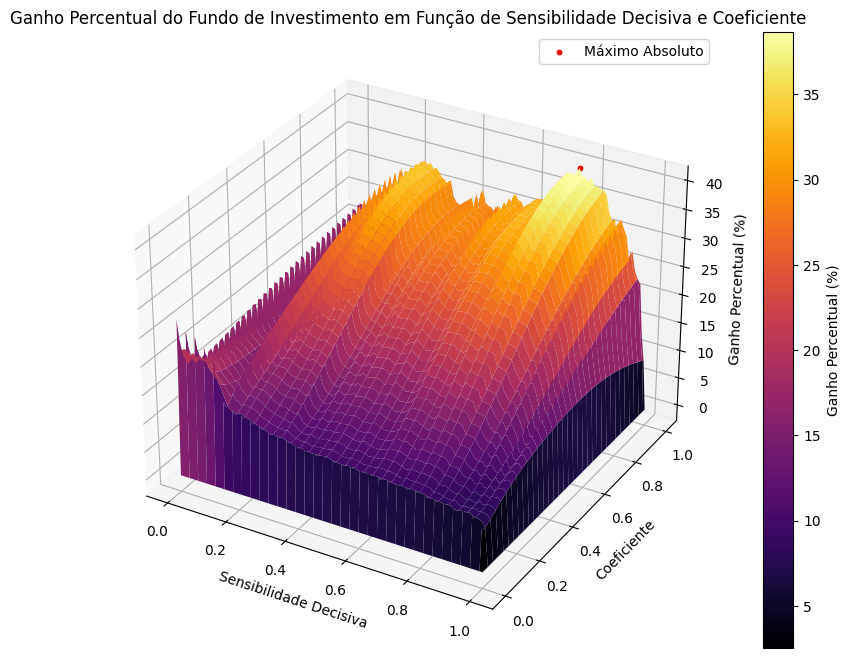

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Arrays para sensibilidade_decisiva e coeficiente
sensibilidade_decisiva_array = np.arange(0, 1.01, 0.01)
coeficiente_array = np.arange(0, 1.01, 0.01)

# Matriz para armazenar os ganhos percentuais
percentual_ganhos = np.zeros((len(sensibilidade_decisiva_array), len(coeficiente_array)))

# Inicializar variáveis para a estratégia
initial_fund = 100000  # Fundo inicial de $100,000

# Loop sobre todos os valores de sensibilidade_decisiva e coeficiente
for i, sensibilidade_decisiva in enumerate(sensibilidade_decisiva_array):
    for j, coeficiente in enumerate(coeficiente_array):

        # Variáveis de controle do fundo
        fund = initial_fund
        num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

        # Iterar pelo tensor (exceto o último que não tem previsão)
        for k in range(len(tensor_np) - 1):
            current_price = float(tensor_np[k + 1][0])  # Preço da ação para compra/venda
            prediction_str = tensor_np[k][1]  # Previsão atual (grau de certeza)

            # Verificar se prediction_str pode ser convertido para float
            if prediction_str != 'none':
                prediction = float(prediction_str)
            else:
                prediction = 0  # Definir a previsão como 0 se for 'none'

            if prediction > sensibilidade_decisiva and fund > 0:
                grau_certeza = abs(prediction)  # Grau de certeza do modelo
                # Comprar ações com base no percentual calculado
                amount_to_invest = coeficiente * grau_certeza * fund
                num_shares_to_buy = amount_to_invest / current_price  # Quantidade de ações que podemos comprar (fracionária)
                fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
                num_shares += num_shares_to_buy  # Atualiza o número de ações

            elif prediction <= sensibilidade_decisiva and num_shares > 0:
                grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
                # Vender ações com base no percentual calculado
                amount_to_sell = coeficiente * grau_certeza * num_shares  # Quantidade de ações a vender
                num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
                fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
                num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda

        # No final do tensor, vender qualquer ação restante
        if num_shares > 0:
            final_price = float(tensor_np[-1][0])  # Preço final para venda
            fund += num_shares * final_price  # Vender todas as ações restantes
            num_shares = 0  # Zerar o número de ações

        # Calcular o percentual de crescimento do fundo
        percentual_ganho = ((fund - initial_fund) / initial_fund) * 100
        percentual_ganhos[i, j] = percentual_ganho  # Armazenar o ganho percentual

# Criar o gráfico 3D
X, Y = np.meshgrid(sensibilidade_decisiva_array, coeficiente_array)
Z = percentual_ganhos.T  # Transpor para ter o formato correto

# Encontra o índice do valor máximo de z
row, col = np.unravel_index(np.argmax(Z), Z.shape)

# Obtém as coordenadas correspondentes ao valor máximo de z
x_max_z = X[row, col]
y_max_z = Y[row, col]
z_max_z = Z[row, col]

print(f"Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva={x_max_z:.2f}, Coeficiente={y_max_z:.2f}, Ganho Percentual (%)={z_max_z:.4f}")
print()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico de superfície
img = ax.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none')

# Adiciona a barra de cores (escala de cor)
cbar = fig.colorbar(img)
cbar.set_label('Ganho Percentual (%)')

# Destaca o ponto máximo
ax.scatter(x_max_z, y_max_z, z_max_z, color='red', s=10, label="Máximo Absoluto")

ax.set_title('Ganho Percentual do Fundo de Investimento em Função de Sensibilidade Decisiva e Coeficiente')
ax.set_xlabel('Sensibilidade Decisiva')
ax.set_ylabel('Coeficiente')
ax.set_zlabel('Ganho Percentual (%)')

plt.legend()
plt.show()

**Estudo do Retorno em Função do Valor Inicial do Fundo:**

In [ ]:
sensibilidade_decisiva = 0.76
coeficiente = 1.00

Coordenadas do ponto máximo absoluto: Dinheiro Inicial = $5353638.89, Percentual de Crescimento = 39.586%


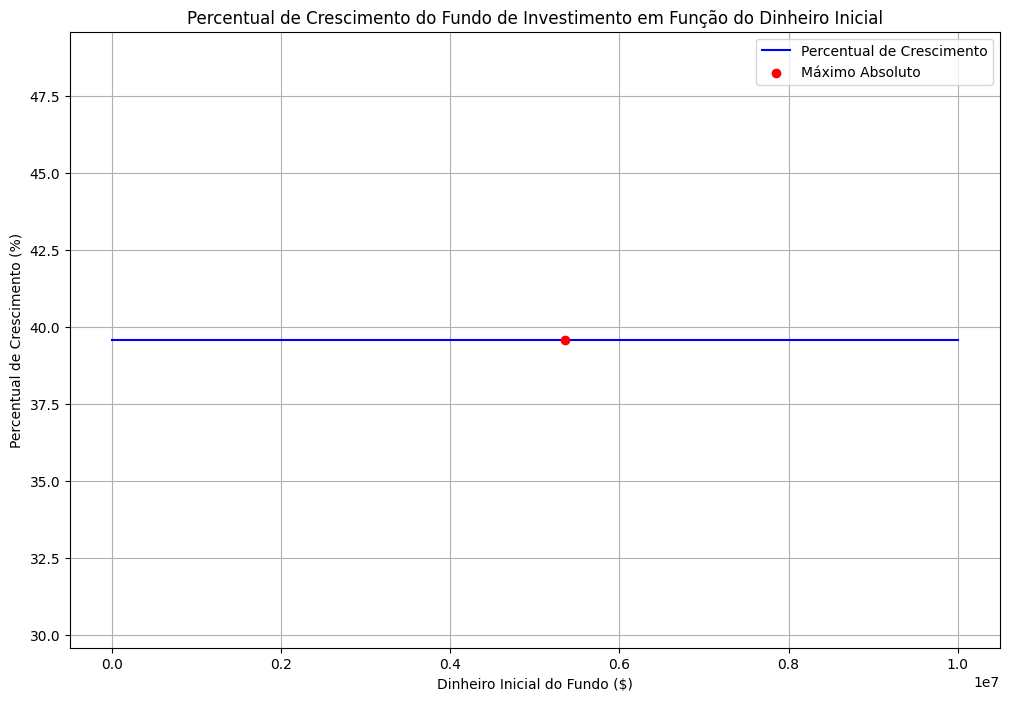

In [ ]:
import matplotlib.pyplot as plt

# Definir a faixa de valores para o fundo inicial
initial_fund_values = np.linspace(50, 10000150, 100)  # Valores de $50 a $10,000,000

# Listas para armazenar os resultados
networth_results = []

# Loop sobre todos os valores de fundo inicial
for initial_fund in initial_fund_values:
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
    networth_strategy = []  # Armazenar a net worth ao longo do tempo

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

        # Verificar se prediction_str pode ser convertido para float
        if prediction_str != 'none':
            prediction = float(prediction_str)
        else:
            prediction = 0  # Definir a previsão como 0 se for 'none'

        if prediction > sensibilidade_decisiva and fund > 0:
            grau_certeza = abs(prediction)  # Grau de certeza do modelo
            # Comprar ações com base no percentual calculado
            amount_to_spend = coeficiente * grau_certeza * fund  # Valor a gastar
            num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
            # Vender ações com base no percentual calculado
            amount_to_sell = coeficiente * grau_certeza * num_shares  # Quantidade de ações a vender
            num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
            fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
            num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda

        # Calcular net worth após cada iteração
        networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
        networth_strategy.append(networth)  # Armazenar a net worth

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações restantes
        num_shares = 0  # Zerar o número de ações

    # Adicionar a net worth final após vender as ações no último período
    networth_strategy.append(fund)

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((networth_strategy[-1] - initial_fund) / initial_fund) * 100
    networth_results.append(percentage_increase_strategy)

# Verificar os valores de networth_results
#print(f"Percentuais de Ganho: {networth_results}")

# Encontrar o índice do valor máximo de networth_results
max_index = np.argmax(networth_results)
max_initial_fund = initial_fund_values[max_index]
max_percentage_increase = networth_results[max_index]

print(f"Coordenadas do ponto máximo absoluto: Dinheiro Inicial = ${max_initial_fund:.2f}, Percentual de Crescimento = {max_percentage_increase:.3f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(initial_fund_values, networth_results, label='Percentual de Crescimento', color='blue')
plt.scatter(max_initial_fund, max_percentage_increase, color='red', zorder=5, label="Máximo Absoluto")  # Destacar o ponto máximo

# Ajustar limites do eixo Y com base nos dados
plt.ylim(min(networth_results) - 10, max(networth_results) + 10)

plt.title('Percentual de Crescimento do Fundo de Investimento em Função do Dinheiro Inicial')
plt.xlabel('Dinheiro Inicial do Fundo ($)')
plt.ylabel('Percentual de Crescimento (%)')
plt.grid(True)
plt.legend()
plt.show()

### **Independent Parcial Buy and Sell in Function of Predictions Probabilaty**

Agora eu quero testar uma nova estratégia. As compras e as vendas vão ser de forma percentual. Ou seja, sempre que existe um sinal positivo para compra - "1", deve ser gasto "coeficiente * grau_certeza"% (o grau_certeza é dado por "predictions", relembrando que sempre que "predictions" é superior a "sensibilidade_decisiva" é um "1" e sempre que "predictions" é inferior a "sensibilidade_decisiva" é um "0", o grau_certeza é pela certeza que o modelo tem se se trata de um "0" ou de um "1", isto pode ser inferido através de "predictions") do dinheiro do fundo de investimento na compra de ações, se existir algum dinheiro ainda no fundo para o fazer de acordo com o percentual calculado. Sempre que existe um sinal positivo de venda - "0", devem ser vendidas "coeficiente * grau_certeza"% das ações do fundo de investimento, se o fundo tiver ainda ações suficientes para o fazer de acordo com a percentagem calculada. Escreve o código para esta nova estratégia. A questão que aqui diferencia da passada estratégia é que agora vão existir 2 coeficientes em jogo um coeficente para ações de venda, coeficiente_v, outro para ações de compra, coeficiente_c.

In [ ]:
sensibilidade_decisiva = 0.80
coeficiente_v = 0.70
coeficiente_c = 1.00

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
        fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
        print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    print(f"Vendido {num_shares:.4f} ações a {final_price:.2f} cada no final, fundo total: ${fund:.2f}")
    num_shares = 0  # Zerar o número de ações

# Exibir o balanço final do fundo
print(f"\nBalanço final do fundo de investimento: ${fund:.2f}")

# Calcular o percentual de crescimento
percentage_increase_strategy = ((fund - initial_fund) / initial_fund ) * 100
print(f"\nPercentual de crescimento do fundo com a nova estratégia: {percentage_increase_strategy:.3f}%")

Comprado 594.4761 ações a 167.87 cada, fundo restante: $205.29
Comprado 1.2187 ações a 167.47 cada, fundo restante: $1.19
Vendido 254.1867 ações a 167.37 cada, fundo total: $42543.14
Vendido 205.1221 ações a 167.87 cada, fundo total: $76976.99
Vendido 76.8866 ações a 166.90 cada, fundo total: $89809.47
Comprado 535.6683 ações a 167.36 cada, fundo restante: $160.03
Comprado 0.9161 ações a 168.03 cada, fundo restante: $6.10
Vendido 286.4493 ações a 167.21 cada, fundo total: $47903.28
Vendido 183.7068 ações a 167.46 cada, fundo total: $78666.81
Vendido 62.5551 ações a 167.80 cada, fundo total: $89163.56
Comprado 525.0003 ações a 169.40 cada, fundo restante: $228.52
Comprado 1.1227 ações a 168.71 cada, fundo restante: $39.11
Vendido 360.3777 ações a 169.26 cada, fundo total: $61038.44
Vendido 137.4509 ações a 169.21 cada, fundo total: $84296.50
Vendido 55.0862 ações a 170.01 cada, fundo total: $93661.70
Comprado 499.8400 ações a 169.49 cada, fundo restante: $8943.82
Comprado 52.4780 ações 

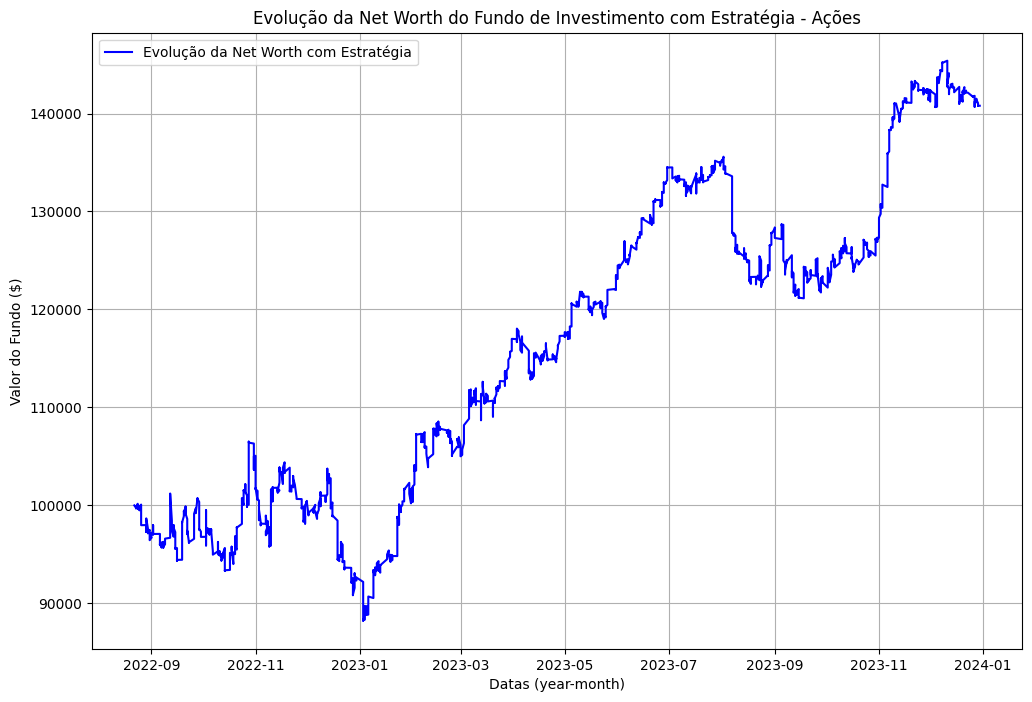

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
networth_strategy = []  # Armazenar a net worth ao longo do tempo

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        #print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
        num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
        fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda
        #print(f"Vendido {num_shares_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

    # Calcular net worth após cada iteração
    networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
    networth_strategy.append(networth)  # Armazenar a net worth

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    num_shares = 0  # Zerar o número de ações

# Adicionar a net worth final após vender as ações no último período
networth_strategy.append(fund)

# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-len(networth_strategy):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

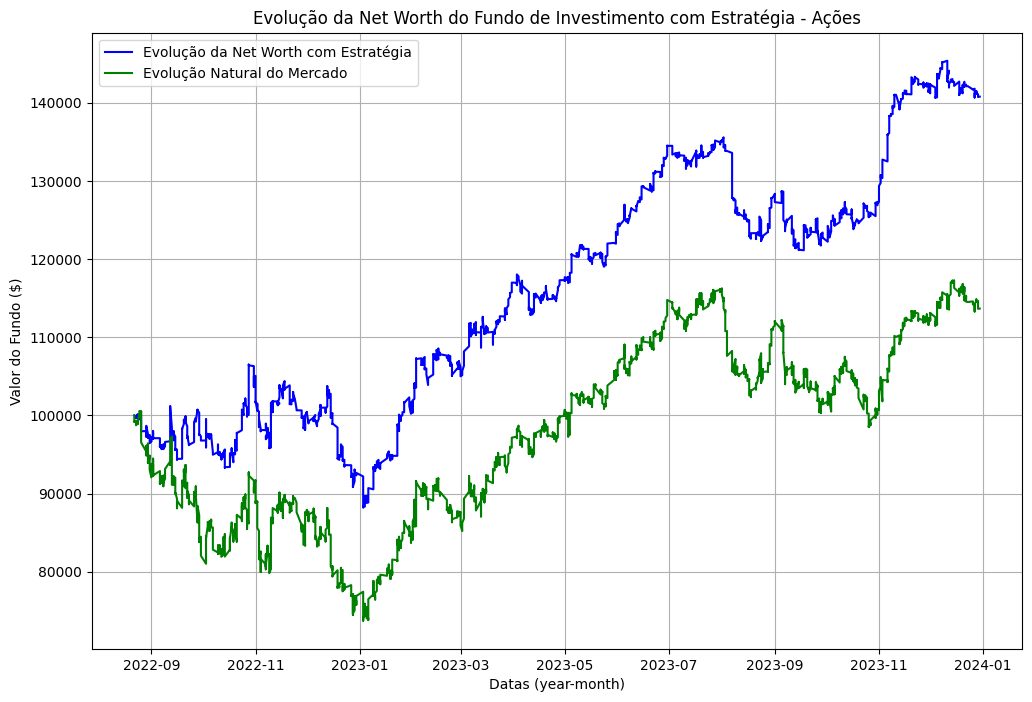

In [ ]:
# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-(len(networth_strategy)):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Dinheiro extra ganho ao se ter usado AI: {fund-percentage_increase-final_value:.3f}$")

print(f"\nMelhoria percentual ao se ter usado AI: {percentage_increase_strategy-percentage_increase:.3f}%")

Dinheiro extra ganho ao se ter usado AI: 27109.105$

Melhoria percentual ao se ter usado AI: 27.123%


**Estudo do Melhor Coeficiente e Melhor Sensibilidade DEcisiva para Formatar o Percentual Investido:**

Coordenadas do ponto com o valor máximo de ganho percentual:
Sensibilidade Decisiva=0.80, Coeficiente C=1.00, Coeficiente V=0.70, Ganho Percentual (%)=40.7941


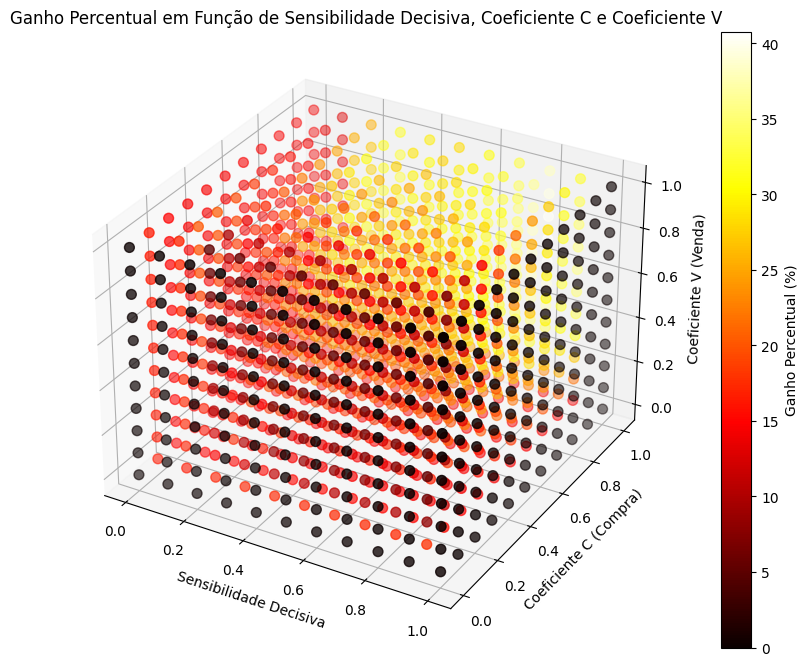

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Arrays para sensibilidade_decisiva, coeficiente_c e coeficiente_v
sensibilidade_decisiva_array = np.arange(0, 1.01, 0.1)
coeficiente_c_array = np.arange(0, 1.01, 0.1)
coeficiente_v_array = np.arange(0, 1.01, 0.1)

# Inicializar variáveis para a estratégia
initial_fund = 100000  # Fundo inicial de $100,000

# Lista para armazenar coordenadas e os respectivos ganhos
x_vals = []
y_vals = []
z_vals = []
color_vals = []

# Loop sobre todos os valores de sensibilidade_decisiva, coeficiente_c e coeficiente_v
for i, sensibilidade_decisiva in enumerate(sensibilidade_decisiva_array):
    for j, coeficiente_c in enumerate(coeficiente_c_array):
        for k, coeficiente_v in enumerate(coeficiente_v_array):

            # Variáveis de controle do fundo
            fund = initial_fund
            num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

            # Iterar pelo tensor (exceto o último que não tem previsão)
            for m in range(len(tensor_np) - 1):
                current_price = float(tensor_np[m + 1][0])  # Preço da ação para compra/venda
                prediction_str = tensor_np[m][1]  # Previsão atual (grau de certeza)

                # Verificar se prediction_str pode ser convertido para float
                if prediction_str != 'none':
                    prediction = float(prediction_str)
                else:
                    prediction = 0  # Definir a previsão como 0 se for 'none'

                if prediction > sensibilidade_decisiva and fund > 0:
                    grau_certeza = abs(prediction)  # Grau de certeza do modelo
                    # Comprar ações com base no percentual calculado
                    amount_to_invest = coeficiente_c * grau_certeza * fund
                    num_shares_to_buy = amount_to_invest / current_price  # Quantidade de ações que podemos comprar (fracionária)
                    fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
                    num_shares += num_shares_to_buy  # Atualiza o número de ações

                elif prediction <= sensibilidade_decisiva and num_shares > 0:
                    grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
                    # Vender ações com base no percentual calculado
                    amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
                    num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
                    fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
                    num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda

            # No final do tensor, vender qualquer ação restante
            if num_shares > 0:
                final_price = float(tensor_np[-1][0])  # Preço final para venda
                fund += num_shares * final_price  # Vender todas as ações restantes
                num_shares = 0  # Zerar o número de ações

            # Calcular o percentual de crescimento do fundo
            percentual_ganho = ((fund - initial_fund) / initial_fund) * 100

            # Armazenar as coordenadas e o ganho percentual
            x_vals.append(sensibilidade_decisiva)
            y_vals.append(coeficiente_c)
            z_vals.append(coeficiente_v)
            color_vals.append(percentual_ganho)

# Convertendo para numpy arrays
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)
color_vals = np.array(color_vals)

# Criar o gráfico 3D com a cor representando o percentual de ganhos
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D com a cor representando o percentual de ganhos
img = ax.scatter(x_vals, y_vals, z_vals, c=color_vals, cmap='hot', s=50)

# Adicionar barra de cor
cbar = fig.colorbar(img)
cbar.set_label('Ganho Percentual (%)')

ax.set_title('Ganho Percentual em Função de Sensibilidade Decisiva, Coeficiente C e Coeficiente V')
ax.set_xlabel('Sensibilidade Decisiva')
ax.set_ylabel('Coeficiente C (Compra)')
ax.set_zlabel('Coeficiente V (Venda)')

# Localizar o índice do valor máximo em color_vals (ganhos percentuais)
max_index = np.argmax(color_vals)

# Obter as coordenadas correspondentes ao valor máximo
x_max = x_vals[max_index]  # Sensibilidade decisiva
y_max = y_vals[max_index]  # Coeficiente C (compra)
z_max = z_vals[max_index]  # Coeficiente V (venda)
max_gain = color_vals[max_index]  # Ganho percentual máximo

# Exibir as coordenadas do ponto com o valor máximo
print(f"Coordenadas do ponto com o valor máximo de ganho percentual:")
print(f"Sensibilidade Decisiva={x_max:.2f}, Coeficiente C={y_max:.2f}, Coeficiente V={z_max:.2f}, Ganho Percentual (%)={max_gain:.4f}")


plt.show()

**Estudo do Retorno em Função do Valor Inicial do Fundo:**

In [ ]:
sensibilidade_decisiva = 0.80
coeficiente_v = 0.70
coeficiente_c = 1.00

Coordenadas do ponto máximo absoluto: Dinheiro Inicial = $4040494.44, Percentual de Crescimento = 40.794%


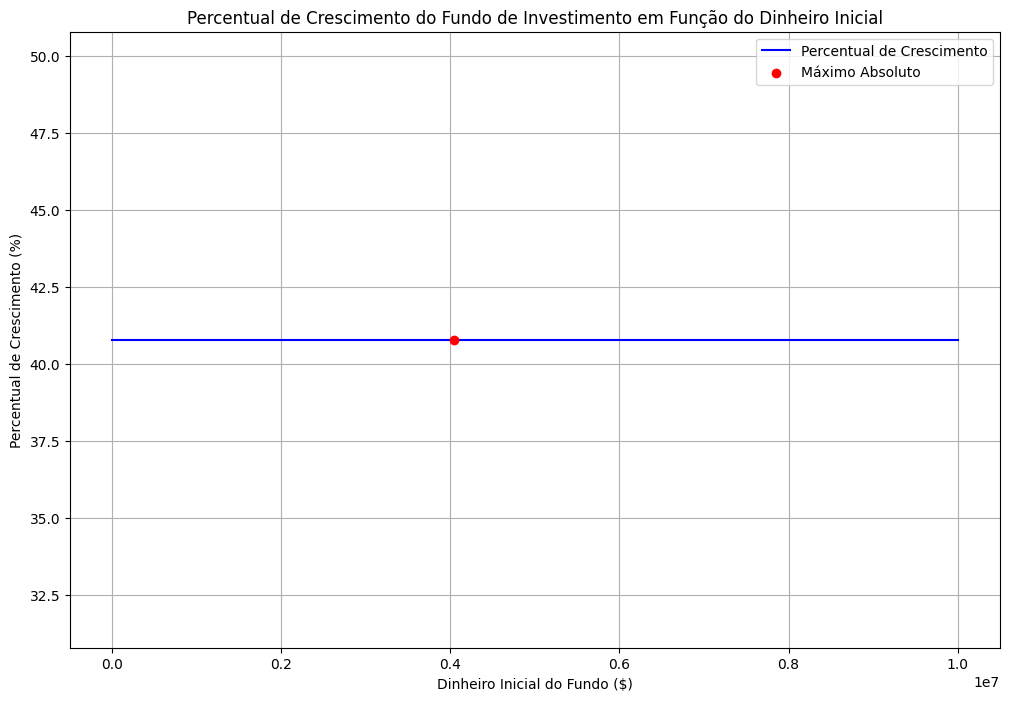

In [ ]:
import matplotlib.pyplot as plt

# Definir a faixa de valores para o fundo inicial
initial_fund_values = np.linspace(50, 10000150, 100)  # Valores de $50 a $10,000,000

# Listas para armazenar os resultados
networth_results = []

# Loop sobre todos os valores de fundo inicial
for initial_fund in initial_fund_values:
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
    networth_strategy = []  # Armazenar a net worth ao longo do tempo

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

        # Verificar se prediction_str pode ser convertido para float
        if prediction_str != 'none':
            prediction = float(prediction_str)
        else:
            prediction = 0  # Definir a previsão como 0 se for 'none'

        if prediction > sensibilidade_decisiva and fund > 0:
            grau_certeza = abs(prediction)  # Grau de certeza do modelo
            # Comprar ações com base no percentual calculado
            amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
            num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
            # Vender ações com base no percentual calculado
            amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
            num_shares_to_sell = amount_to_sell  # Quantidade fracionária de ações a vender
            fund += num_shares_to_sell * current_price  # Vende as ações e atualiza o fundo
            num_shares -= num_shares_to_sell  # Atualiza o número de ações após a venda

        # Calcular net worth após cada iteração
        networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
        networth_strategy.append(networth)  # Armazenar a net worth

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações restantes
        num_shares = 0  # Zerar o número de ações

    # Adicionar a net worth final após vender as ações no último período
    networth_strategy.append(fund)

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((networth_strategy[-1] - initial_fund) / initial_fund) * 100
    networth_results.append(percentage_increase_strategy)

# Verificar os valores de networth_results
#print(f"Percentuais de Ganho: {networth_results}")

# Encontrar o índice do valor máximo de networth_results
max_index = np.argmax(networth_results)
max_initial_fund = initial_fund_values[max_index]
max_percentage_increase = networth_results[max_index]

print(f"Coordenadas do ponto máximo absoluto: Dinheiro Inicial = ${max_initial_fund:.2f}, Percentual de Crescimento = {max_percentage_increase:.3f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(initial_fund_values, networth_results, label='Percentual de Crescimento', color='blue')
plt.scatter(max_initial_fund, max_percentage_increase, color='red', zorder=5, label="Máximo Absoluto")  # Destacar o ponto máximo

# Ajustar limites do eixo Y com base nos dados
plt.ylim(min(networth_results) - 10, max(networth_results) + 10)

plt.title('Percentual de Crescimento do Fundo de Investimento em Função do Dinheiro Inicial')
plt.xlabel('Dinheiro Inicial do Fundo ($)')
plt.ylabel('Percentual de Crescimento (%)')
plt.grid(True)
plt.legend()
plt.show()

### **Parcial Buy in Function of Predictions Probabilaty and Absolute Sell**

Agora eu quero testar uma nova estratégia. As compras vão ser de forma percentual e as vendas absolutas. Ou seja, sempre que existe um sinal positivo para compra - "1", deve ser gasto "coeficiente * grau_certeza"% (o grau_certeza é dado por "predictions", relembrando que sempre que "predictions" é superior a "sensibilidade_decisiva" é um "1" e sempre que "predictions" é inferior a "sensibilidade_decisiva" é um "0", o grau_certeza é pela certeza que o modelo tem se se trata de um "0" ou de um "1", isto pode ser inferido através de "predictions") do dinheiro do fundo de investimento na compra de ações, se existir algum dinheiro ainda no fundo para o fazer de acordo com o percentual calculado. Sempre que existe um sinal positivo de venda - "0", devem ser vendidas todas as ações do fundo, se existirem alguma.

In [ ]:
sensibilidade_decisiva = 0.76
coeficiente_c = 1.00

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        # Vender ações fracionárias
        fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
        print(f"Vendido {num_shares:.6f} ações a {current_price} cada, fundo total: ${fund:.2f}")
        num_shares = 0.0  # Zerar o número de ações

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    print(f"Vendido {num_shares:.4f} ações a {final_price:.2f} cada no final, fundo total: ${fund:.2f}")
    num_shares = 0  # Zerar o número de ações

# Exibir o balanço final do fundo
print(f"\nBalanço final do fundo de investimento: ${fund:.2f}")

# Calcular o percentual de crescimento
percentage_increase_strategy = ((fund - initial_fund) / initial_fund ) * 100
print(f"\nPercentual de crescimento do fundo com a nova estratégia: {percentage_increase_strategy:.3f}%")

Comprado 594.4761 ações a 167.87 cada, fundo restante: $205.29
Comprado 1.2187 ações a 167.47 cada, fundo restante: $1.19
Vendido 595.694874 ações a 167.365 cada, fundo total: $99699.66
Comprado 594.6583 ações a 167.36 cada, fundo restante: $177.65
Comprado 1.0170 ações a 168.03 cada, fundo restante: $6.77
Vendido 595.675266 ações a 167.21 cada, fundo total: $99609.63
Comprado 586.5073 ações a 169.40 cada, fundo restante: $255.29
Comprado 1.2543 ações a 168.71 cada, fundo restante: $43.69
Vendido 587.761546 ações a 169.265 cada, fundo total: $99531.15
Comprado 531.1632 ações a 169.49 cada, fundo restante: $9504.30
Comprado 55.7666 ações a 169.90 cada, fundo restante: $29.55
Vendido 586.929787 ações a 167.82 cada, fundo total: $98528.11
Comprado 600.6962 ações a 161.57 cada, fundo restante: $1473.68
Vendido 600.696227 ações a 160.3899 cada, fundo total: $97819.29
Comprado 593.0673 ações a 161.32 cada, fundo restante: $2145.66
Comprado 12.4863 ações a 161.20 cada, fundo restante: $132.88

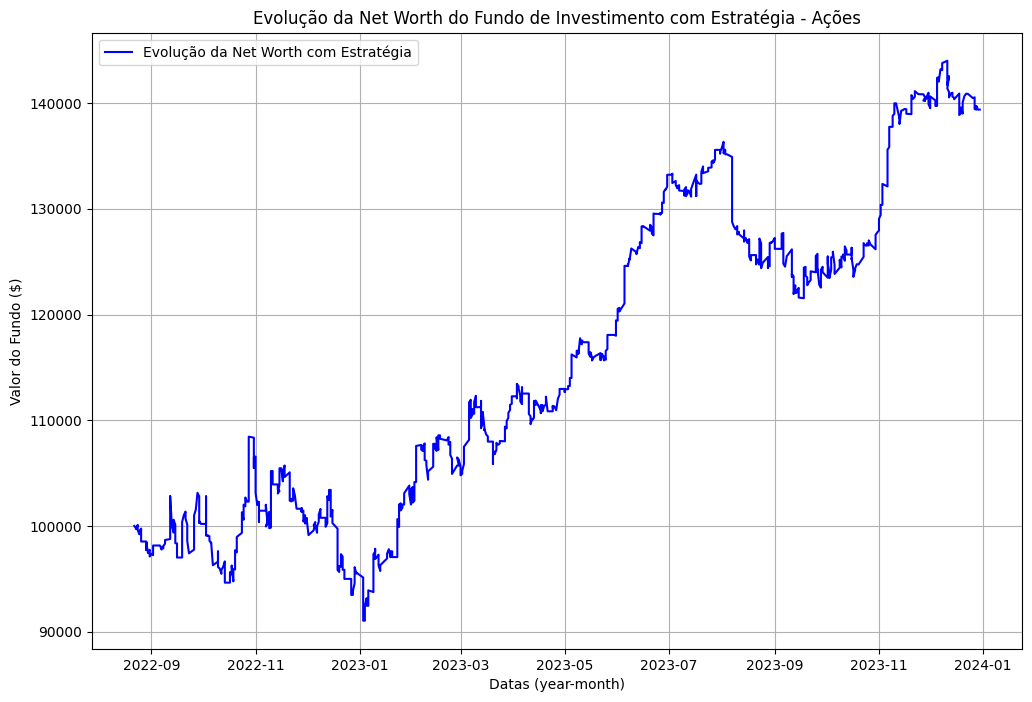

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
networth_strategy = []  # Armazenar a net worth ao longo do tempo

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        grau_certeza = abs(prediction)  # Grau de certeza do modelo
        # Comprar ações com base no percentual calculado
        amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
        num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        #print(f"Comprado {num_shares_to_buy:.4f} ações a {current_price:.2f} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        # Vender ações fracionárias
        fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
        #print(f"Vendido {num_shares:.6f} ações a {current_price} cada, fundo total: ${fund:.2f}")
        num_shares = 0.0  # Zerar o número de ações

    # Calcular net worth após cada iteração
    networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
    networth_strategy.append(networth)  # Armazenar a net worth

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    num_shares = 0  # Zerar o número de ações

# Adicionar a net worth final após vender as ações no último período
networth_strategy.append(fund)

# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-len(networth_strategy):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

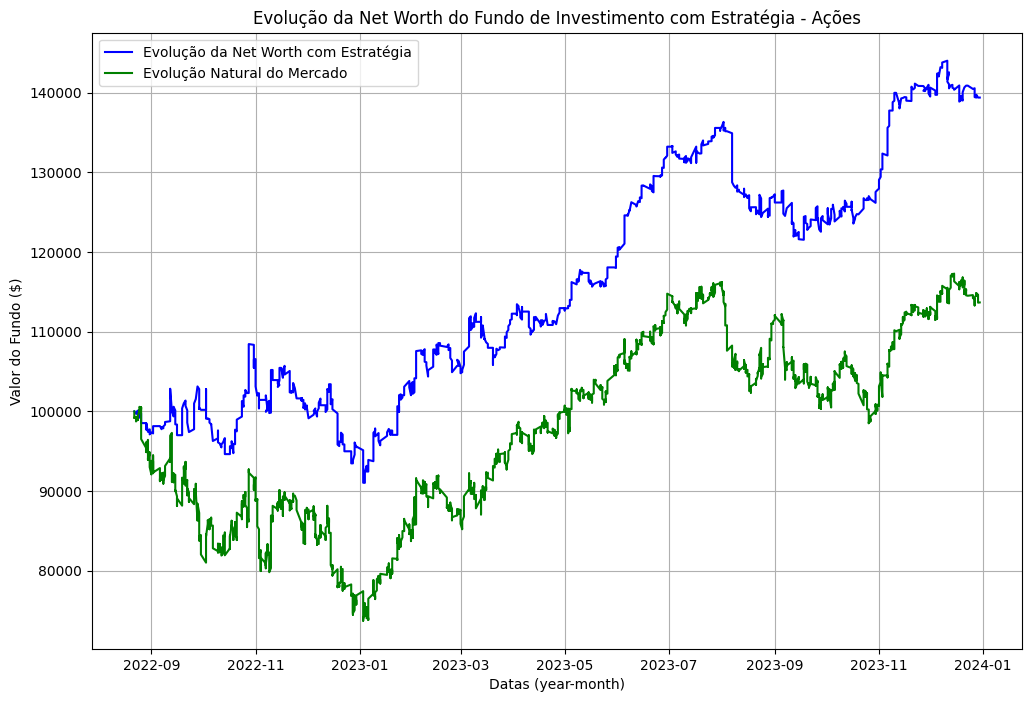

In [ ]:
# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-(len(networth_strategy)):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Dinheiro extra ganho ao se ter usado AI: {fund-percentage_increase-final_value:.3f}$")

print(f"\nMelhoria percentual ao se ter usado AI: {percentage_increase_strategy-percentage_increase:.3f}%")

Dinheiro extra ganho ao se ter usado AI: 25696.764$

Melhoria percentual ao se ter usado AI: 25.710%


**Estudo do Melhor Coeficiente e Melhor Sensibilidade DEcisiva para Formatar o Percentual Investido:**

Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva=0.76, Coeficiente C=1.00, Ganho Percentual (%)=39.3818



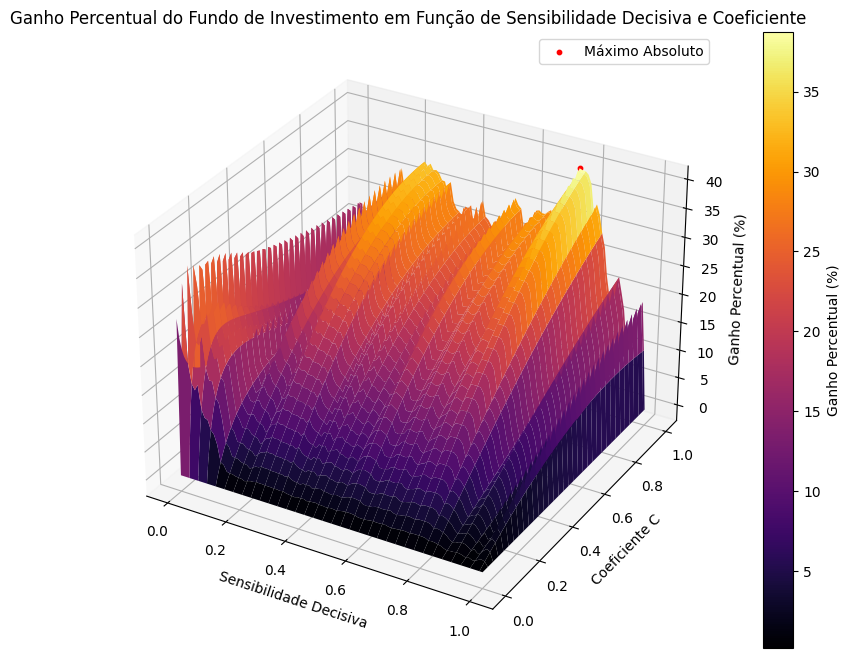

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Arrays para sensibilidade_decisiva e coeficiente
sensibilidade_decisiva_array = np.arange(0, 1.01, 0.01)
coeficiente_c_array = np.arange(0, 1.01, 0.01)

# Matriz para armazenar os ganhos percentuais
percentual_ganhos = np.zeros((len(sensibilidade_decisiva_array), len(coeficiente_array)))

# Inicializar variáveis para a estratégia
initial_fund = 100000  # Fundo inicial de $100,000

# Loop sobre todos os valores de sensibilidade_decisiva e coeficiente
for i, sensibilidade_decisiva in enumerate(sensibilidade_decisiva_array):
    for j, coeficiente_c in enumerate(coeficiente_c_array):

        # Variáveis de controle do fundo
        fund = initial_fund
        num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

        # Iterar pelo tensor (exceto o último que não tem previsão)
        for k in range(len(tensor_np) - 1):
            current_price = float(tensor_np[k + 1][0])  # Preço da ação para compra/venda
            prediction_str = tensor_np[k][1]  # Previsão atual (grau de certeza)

            # Verificar se prediction_str pode ser convertido para float
            if prediction_str != 'none':
                prediction = float(prediction_str)
            else:
                prediction = 0  # Definir a previsão como 0 se for 'none'

            if prediction > sensibilidade_decisiva and fund > 0:
                grau_certeza = abs(prediction)  # Grau de certeza do modelo
                # Comprar ações com base no percentual calculado
                amount_to_invest = coeficiente_c * grau_certeza * fund
                num_shares_to_buy = amount_to_invest / current_price  # Quantidade de ações que podemos comprar (fracionária)
                fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
                num_shares += num_shares_to_buy  # Atualiza o número de ações

            elif prediction <= sensibilidade_decisiva and num_shares > 0:
                # Vender ações fracionárias
                fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
                #print(f"Vendido {num_shares:.6f} ações a {current_price} cada, fundo total: ${fund:.2f}")
                num_shares = 0.0  # Zerar o número de ações

        # No final do tensor, vender qualquer ação restante
        if num_shares > 0:
            final_price = float(tensor_np[-1][0])  # Preço final para venda
            fund += num_shares * final_price  # Vender todas as ações restantes
            num_shares = 0  # Zerar o número de ações

        # Calcular o percentual de crescimento do fundo
        percentual_ganho = ((fund - initial_fund) / initial_fund) * 100
        percentual_ganhos[i, j] = percentual_ganho  # Armazenar o ganho percentual

# Criar o gráfico 3D
X, Y = np.meshgrid(sensibilidade_decisiva_array, coeficiente_c_array)
Z = percentual_ganhos.T  # Transpor para ter o formato correto

# Encontra o índice do valor máximo de z
row, col = np.unravel_index(np.argmax(Z), Z.shape)

# Obtém as coordenadas correspondentes ao valor máximo de z
x_max_z = X[row, col]
y_max_z = Y[row, col]
z_max_z = Z[row, col]

print(f"Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva={x_max_z:.2f}, Coeficiente C={y_max_z:.2f}, Ganho Percentual (%)={z_max_z:.4f}")
print()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico de superfície
img = ax.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none')

# Adiciona a barra de cores (escala de cor)
cbar = fig.colorbar(img)
cbar.set_label('Ganho Percentual (%)')

# Destaca o ponto máximo
ax.scatter(x_max_z, y_max_z, z_max_z, color='red', s=10, label="Máximo Absoluto")

ax.set_title('Ganho Percentual do Fundo de Investimento em Função de Sensibilidade Decisiva e Coeficiente')
ax.set_xlabel('Sensibilidade Decisiva')
ax.set_ylabel('Coeficiente C')
ax.set_zlabel('Ganho Percentual (%)')

plt.legend()
plt.show()

**Estudo do Retorno em Função do Valor Inicial do Fundo:**

In [ ]:
sensibilidade_decisiva = 0.76
coeficiente_c = 1.00

Coordenadas do ponto máximo absoluto: Dinheiro Inicial = $5858694.44, Percentual de Crescimento = 39.382%


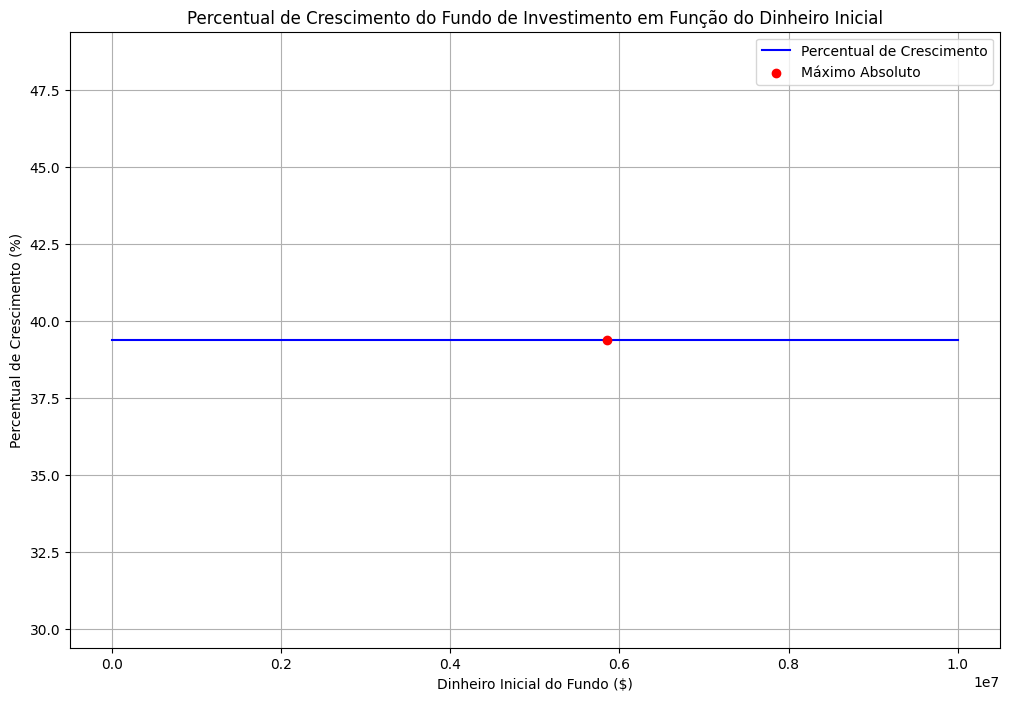

In [ ]:
import matplotlib.pyplot as plt

# Definir a faixa de valores para o fundo inicial
initial_fund_values = np.linspace(50, 10000150, 100)  # Valores de $50 a $10,000,000

# Listas para armazenar os resultados
networth_results = []

# Loop sobre todos os valores de fundo inicial
for initial_fund in initial_fund_values:
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
    networth_strategy = []  # Armazenar a net worth ao longo do tempo

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

        # Verificar se prediction_str pode ser convertido para float
        if prediction_str != 'none':
            prediction = float(prediction_str)
        else:
            prediction = 0  # Definir a previsão como 0 se for 'none'

        if prediction > sensibilidade_decisiva and fund > 0:
            grau_certeza = abs(prediction)  # Grau de certeza do modelo
            # Comprar ações com base no percentual calculado
            amount_to_spend = coeficiente_c * grau_certeza * fund  # Valor a gastar
            num_shares_to_buy = amount_to_spend / current_price  # Quantidade de ações que podemos comprar (fracionária)
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            # Vender ações fracionárias
            fund += num_shares * current_price  # Vende todas as ações e atualiza o fundo
            #print(f"Vendido {num_shares:.6f} ações a {current_price} cada, fundo total: ${fund:.2f}")
            num_shares = 0.0  # Zerar o número de ações

        # Calcular net worth após cada iteração
        networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
        networth_strategy.append(networth)  # Armazenar a net worth

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações restantes
        num_shares = 0  # Zerar o número de ações

    # Adicionar a net worth final após vender as ações no último período
    networth_strategy.append(fund)

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((networth_strategy[-1] - initial_fund) / initial_fund) * 100
    networth_results.append(percentage_increase_strategy)

# Verificar os valores de networth_results
#print(f"Percentuais de Ganho: {networth_results}")

# Encontrar o índice do valor máximo de networth_results
max_index = np.argmax(networth_results)
max_initial_fund = initial_fund_values[max_index]
max_percentage_increase = networth_results[max_index]

print(f"Coordenadas do ponto máximo absoluto: Dinheiro Inicial = ${max_initial_fund:.2f}, Percentual de Crescimento = {max_percentage_increase:.3f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(initial_fund_values, networth_results, label='Percentual de Crescimento', color='blue')
plt.scatter(max_initial_fund, max_percentage_increase, color='red', zorder=5, label="Máximo Absoluto")  # Destacar o ponto máximo

# Ajustar limites do eixo Y com base nos dados
plt.ylim(min(networth_results) - 10, max(networth_results) + 10)

plt.title('Percentual de Crescimento do Fundo de Investimento em Função do Dinheiro Inicial')
plt.xlabel('Dinheiro Inicial do Fundo ($)')
plt.ylabel('Percentual de Crescimento (%)')
plt.grid(True)
plt.legend()
plt.show()

### **Absolute Buy and Parcial Sell in Function of Predictions Probabilaty**

Agora eu quero testar uma nova estratégia. As compras são absolutas e as vendas vão ser de forma percentual. Ou seja, sempre que existe um sinal positivo para compra - "1", deve ser gasto todo o dinheiro do portefólio, se existir algum. Sempre que existe um sinal positivo de venda - "0", devem ser vendidas "coeficiente * grau_certeza"% "coeficiente * grau_certeza"% (o grau_certeza é dado por "predictions", relembrando que sempre que "predictions" é superior a "sensibilidade_decisiva" é um "1" e sempre que "predictions" é inferior a "sensibilidade_decisiva" é um "0", o grau_certeza é pela certeza que o modelo tem se se trata de um "0" ou de um "1", isto pode ser inferido através de "predictions") das ações do fundo de investimento, se o fundo tiver ainda ações suficientes para o fazer de acordo com a percentagem calculada. Escreve o código para esta nova estratégia.

In [ ]:
sensibilidade_decisiva = 0.76
coeficiente_v = 0.69

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        # Comprar ações fracionárias
        num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        print(f"Comprado {num_shares_to_buy:.6f} ações a {current_price} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
        fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
        print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    print(f"Vendido {num_shares:.4f} ações a {final_price:.2f} cada no final, fundo total: ${fund:.2f}")
    num_shares = 0  # Zerar o número de ações

# Exibir o balanço final do fundo
print(f"\nBalanço final do fundo de investimento: ${fund:.2f}")

# Calcular o percentual de crescimento
percentage_increase_strategy = ((fund - initial_fund) / initial_fund ) * 100
print(f"\nPercentual de crescimento do fundo com a nova estratégia: {percentage_increase_strategy:.3f}%")

Comprado 595.699053 ações a 167.87 cada, fundo restante: $0.00
Vendido 250.5572 ações a 167.37 cada, fundo total: $41934.51
Vendido 204.3431 ações a 167.87 cada, fundo total: $76237.58
Vendido 78.2402 ações a 166.90 cada, fundo total: $89296.00
Comprado 533.556389 ações a 167.36 cada, fundo restante: $0.00
Vendido 282.3718 ações a 167.21 cada, fundo total: $47215.39
Vendido 183.4851 ações a 167.46 cada, fundo total: $77941.81
Vendido 63.7817 ações a 167.80 cada, fundo total: $88644.38
Comprado 523.284436 ações a 169.4 cada, fundo restante: $0.00
Vendido 355.3891 ações a 169.26 cada, fundo total: $60154.94
Vendido 138.5939 ações a 169.21 cada, fundo total: $83606.41
Vendido 56.7341 ações a 170.01 cada, fundo total: $93251.78
Comprado 550.190435 ações a 169.49 cada, fundo restante: $0.00
Vendido 358.8227 ações a 167.82 cada, fundo total: $60217.62
Vendido 136.2869 ações a 164.99 cada, fundo total: $82703.60
Vendido 52.1669 ações a 163.17 cada, fundo total: $91215.67
Vendido 14.2544 ações

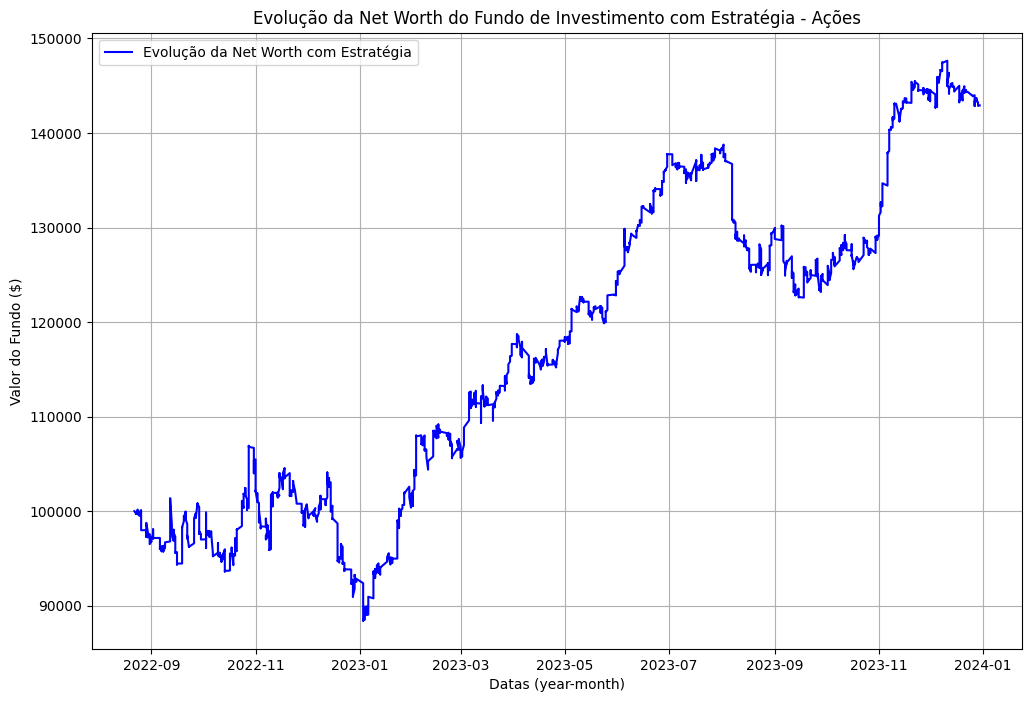

In [ ]:
# Inicializar variáveis
initial_fund = 100000  # Fundo inicial de $100,000
fund = initial_fund
num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
networth_strategy = []  # Armazenar a net worth ao longo do tempo

# Iterar pelo tensor (exceto o último que não tem previsão)
for i in range(len(tensor_np) - 1):
    current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
    prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

    # Verificar se prediction_str pode ser convertido para float
    if prediction_str != 'none':
        prediction = float(prediction_str)
    else:
        prediction = 0  # Definir a previsão como 0 se for 'none'

    if prediction > sensibilidade_decisiva and fund > 0:
        # Comprar ações fracionárias
        num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
        fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
        num_shares += num_shares_to_buy  # Atualiza o número de ações
        #print(f"Comprado {num_shares_to_buy:.6f} ações a {current_price} cada, fundo restante: ${fund:.2f}")

    elif prediction <= sensibilidade_decisiva and num_shares > 0:
        grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
        # Vender ações com base no percentual calculado
        amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
        fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
        num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
        #print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

    # Calcular net worth após cada iteração
    networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
    networth_strategy.append(networth)  # Armazenar a net worth

# No final do tensor, vender qualquer ação restante
if num_shares > 0:
    final_price = float(tensor_np[-1][0])  # Preço final para venda
    fund += num_shares * final_price  # Vender todas as ações restantes
    num_shares = 0  # Zerar o número de ações

# Adicionar a net worth final após vender as ações no último período
networth_strategy.append(fund)

# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-len(networth_strategy):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

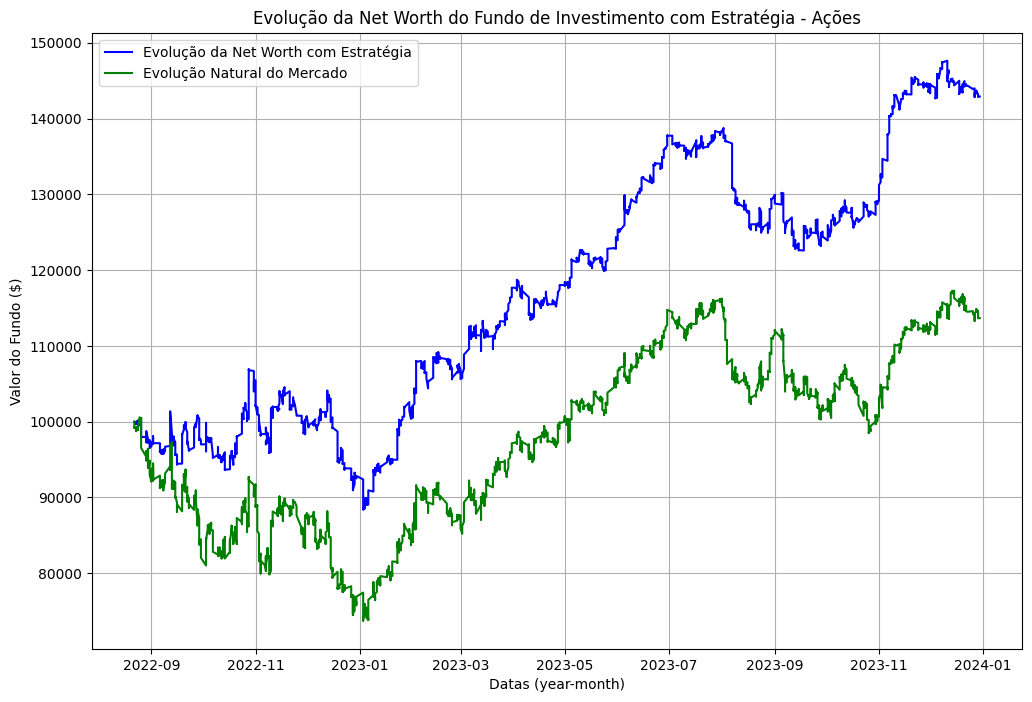

In [ ]:
# Gerar o gráfico da evolução da net worth do fundo com a estratégia
plt.figure(figsize=(12, 8))
plt.plot(dates_list[-(len(networth_strategy)):], networth_strategy, label='Evolução da Net Worth com Estratégia', color='blue')
plt.plot(last_subsets_dates, natural_fund_values, label='Evolução Natural do Mercado', color='green')

plt.title('Evolução da Net Worth do Fundo de Investimento com Estratégia - Ações')
plt.xlabel('Datas (year-month)')
plt.ylabel('Valor do Fundo ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Dinheiro extra ganho ao se ter usado AI: {fund-percentage_increase-final_value:.3f}$")

print(f"\nMelhoria percentual ao se ter usado AI: {percentage_increase_strategy-percentage_increase:.3f}%")

Dinheiro extra ganho ao se ter usado AI: 29228.270$

Melhoria percentual ao se ter usado AI: 29.242%


**Estudo do Melhor Coeficiente e Melhor Sensibilidade DEcisiva para Formatar o Percentual Investido:**

Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva=0.76, Coeficiente V=0.69, Ganho Percentual (%)=42.9133



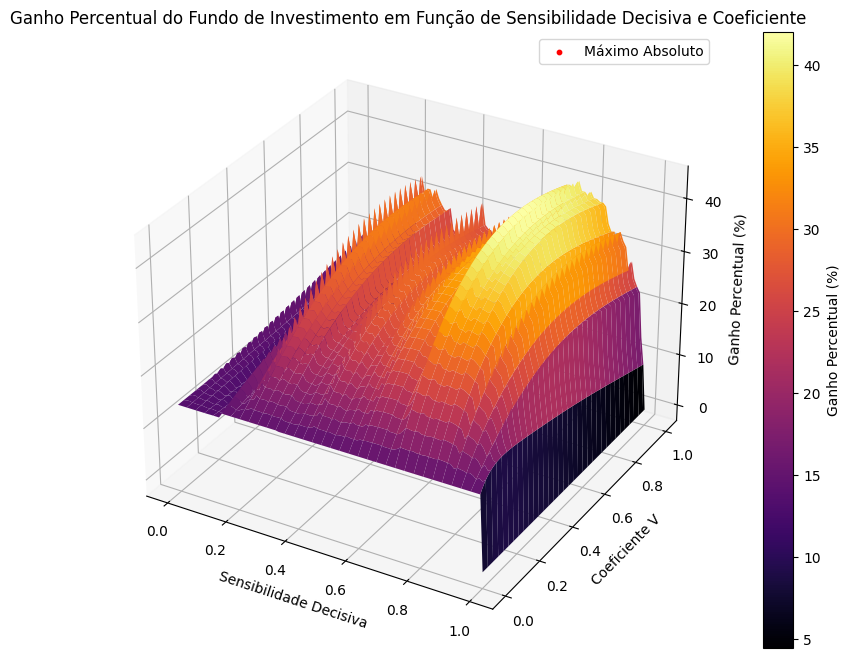

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Arrays para sensibilidade_decisiva e coeficiente
sensibilidade_decisiva_array = np.arange(0, 1.01, 0.01)
coeficiente_v_array = np.arange(0, 1.01, 0.01)

# Matriz para armazenar os ganhos percentuais
percentual_ganhos = np.zeros((len(sensibilidade_decisiva_array), len(coeficiente_array)))

# Inicializar variáveis para a estratégia
initial_fund = 100000  # Fundo inicial de $100,000

# Loop sobre todos os valores de sensibilidade_decisiva e coeficiente
for i, sensibilidade_decisiva in enumerate(sensibilidade_decisiva_array):
    for j, coeficiente_v in enumerate(coeficiente_v_array):

        # Variáveis de controle do fundo
        fund = initial_fund
        num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações

        # Iterar pelo tensor (exceto o último que não tem previsão)
        for k in range(len(tensor_np) - 1):
            current_price = float(tensor_np[k + 1][0])  # Preço da ação para compra/venda
            prediction_str = tensor_np[k][1]  # Previsão atual (grau de certeza)

            # Verificar se prediction_str pode ser convertido para float
            if prediction_str != 'none':
                prediction = float(prediction_str)
            else:
                prediction = 0  # Definir a previsão como 0 se for 'none'

            if prediction > sensibilidade_decisiva and fund > 0:
                # Comprar ações fracionárias
                num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
                fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
                num_shares += num_shares_to_buy  # Atualiza o número de ações
                #print(f"Comprado {num_shares_to_buy:.6f} ações a {current_price} cada, fundo restante: ${fund:.2f}")

            elif prediction <= sensibilidade_decisiva and num_shares > 0:
                grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
                # Vender ações com base no percentual calculado
                amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
                fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
                num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
                #print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

        # No final do tensor, vender qualquer ação restante
        if num_shares > 0:
            final_price = float(tensor_np[-1][0])  # Preço final para venda
            fund += num_shares * final_price  # Vender todas as ações restantes
            num_shares = 0  # Zerar o número de ações

        # Calcular o percentual de crescimento do fundo
        percentual_ganho = ((fund - initial_fund) / initial_fund) * 100
        percentual_ganhos[i, j] = percentual_ganho  # Armazenar o ganho percentual

# Criar o gráfico 3D
X, Y = np.meshgrid(sensibilidade_decisiva_array, coeficiente_v_array)
Z = percentual_ganhos.T  # Transpor para ter o formato correto

# Encontra o índice do valor máximo de z
row, col = np.unravel_index(np.argmax(Z), Z.shape)

# Obtém as coordenadas correspondentes ao valor máximo de z
x_max_z = X[row, col]
y_max_z = Y[row, col]
z_max_z = Z[row, col]

print(f"Coordenadas do ponto com o valor máximo de Z: Sensibilidade Decisiva={x_max_z:.2f}, Coeficiente V={y_max_z:.2f}, Ganho Percentual (%)={z_max_z:.4f}")
print()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico de superfície
img = ax.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none')

# Adiciona a barra de cores (escala de cor)
cbar = fig.colorbar(img)
cbar.set_label('Ganho Percentual (%)')

# Destaca o ponto máximo
ax.scatter(x_max_z, y_max_z, z_max_z, color='red', s=10, label="Máximo Absoluto")

ax.set_title('Ganho Percentual do Fundo de Investimento em Função de Sensibilidade Decisiva e Coeficiente')
ax.set_xlabel('Sensibilidade Decisiva')
ax.set_ylabel('Coeficiente V')
ax.set_zlabel('Ganho Percentual (%)')

plt.legend()
plt.show()

**Estudo do Retorno em Função do Valor Inicial do Fundo:**

In [ ]:
sensibilidade_decisiva = 0.76
coeficiente_v = 0.69

Coordenadas do ponto máximo absoluto: Dinheiro Inicial = $7171838.89, Percentual de Crescimento = 42.913%


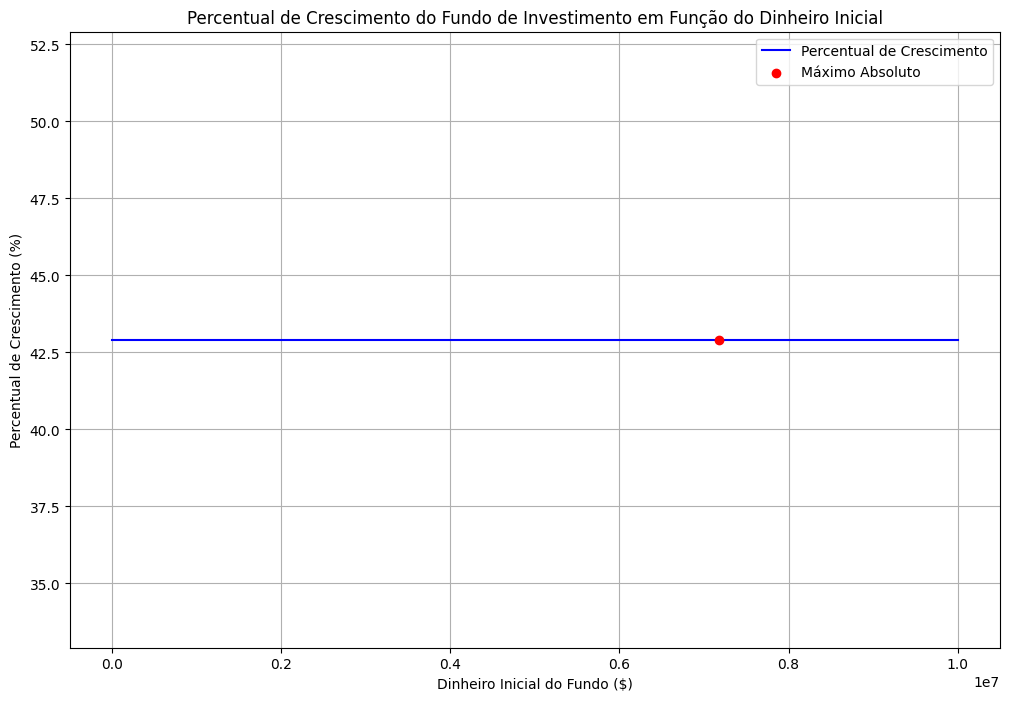

In [ ]:
import matplotlib.pyplot as plt

# Definir a faixa de valores para o fundo inicial
initial_fund_values = np.linspace(50, 10000150, 100)  # Valores de $50 a $10,000,000

# Listas para armazenar os resultados
networth_results = []

# Loop sobre todos os valores de fundo inicial
for initial_fund in initial_fund_values:
    fund = initial_fund
    num_shares = 0.0  # Número de ações atualmente detidas, permitindo frações
    networth_strategy = []  # Armazenar a net worth ao longo do tempo

    # Iterar pelo tensor (exceto o último que não tem previsão)
    for i in range(len(tensor_np) - 1):
        current_price = float(tensor_np[i + 1][0])  # Preço da ação para compra/venda
        prediction_str = tensor_np[i][1]  # Previsão atual (grau de certeza)

        # Verificar se prediction_str pode ser convertido para float
        if prediction_str != 'none':
            prediction = float(prediction_str)
        else:
            prediction = 0  # Definir a previsão como 0 se for 'none'

        if prediction > sensibilidade_decisiva and fund > 0:
            # Comprar ações fracionárias
            num_shares_to_buy = fund / current_price  # Quantidade fracionária de ações que podemos comprar
            fund -= num_shares_to_buy * current_price  # Atualiza o fundo após compra
            num_shares += num_shares_to_buy  # Atualiza o número de ações
            #print(f"Comprado {num_shares_to_buy:.6f} ações a {current_price} cada, fundo restante: ${fund:.2f}")

        elif prediction <= sensibilidade_decisiva and num_shares > 0:
            grau_certeza = abs(1 - prediction)  # Grau de certeza do modelo
            # Vender ações com base no percentual calculado
            amount_to_sell = coeficiente_v * grau_certeza * num_shares  # Quantidade de ações a vender
            fund += amount_to_sell * current_price  # Vende as ações e atualiza o fundo
            num_shares -= amount_to_sell  # Atualiza o número de ações após a venda
            #print(f"Vendido {amount_to_sell:.4f} ações a {current_price:.2f} cada, fundo total: ${fund:.2f}")

        # Calcular net worth após cada iteração
        networth = fund + num_shares * current_price  # Dinheiro no fundo + valor das ações detidas
        networth_strategy.append(networth)  # Armazenar a net worth

    # No final do tensor, vender qualquer ação restante
    if num_shares > 0:
        final_price = float(tensor_np[-1][0])  # Preço final para venda
        fund += num_shares * final_price  # Vender todas as ações restantes
        num_shares = 0  # Zerar o número de ações

    # Adicionar a net worth final após vender as ações no último período
    networth_strategy.append(fund)

    # Calcular o percentual de crescimento
    percentage_increase_strategy = ((networth_strategy[-1] - initial_fund) / initial_fund) * 100
    networth_results.append(percentage_increase_strategy)

# Verificar os valores de networth_results
#print(f"Percentuais de Ganho: {networth_results}")

# Encontrar o índice do valor máximo de networth_results
max_index = np.argmax(networth_results)
max_initial_fund = initial_fund_values[max_index]
max_percentage_increase = networth_results[max_index]

print(f"Coordenadas do ponto máximo absoluto: Dinheiro Inicial = ${max_initial_fund:.2f}, Percentual de Crescimento = {max_percentage_increase:.3f}%")

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(initial_fund_values, networth_results, label='Percentual de Crescimento', color='blue')
plt.scatter(max_initial_fund, max_percentage_increase, color='red', zorder=5, label="Máximo Absoluto")  # Destacar o ponto máximo

# Ajustar limites do eixo Y com base nos dados
plt.ylim(min(networth_results) - 10, max(networth_results) + 10)

plt.title('Percentual de Crescimento do Fundo de Investimento em Função do Dinheiro Inicial')
plt.xlabel('Dinheiro Inicial do Fundo ($)')
plt.ylabel('Percentual de Crescimento (%)')
plt.grid(True)
plt.legend()
plt.show()